## Project Outline: APOL1 Heat Map Development

#### **Project Title:** 
#### Data Collection and Analysis for Identifying Geographic Regions with APOL1-Positive Patients in the UK

#### **Objective:**
#### To gather, organize, validate and analyze data sources to identify regions with the highest number of APOL1-positive patients, forming the foundation for a geographic heat map.

### **Phase I: Data Gathering and Analysis**

#### **1. Primary Hypothesis:**
Regions with higher populations of individuals of African descent in the UK are more likely to have a higher prevalence of APOL1-positive patients.

#### **1. Secondary Hypothesis:**
Distribution of patients with G1/G1, G1/G2, G2/G2 Genotypes and HIVAN with two risk Alleles + HIV diseases have the highest probability of being positive patients for Apol1.

#### **2. Data Analysis:**
- In order to execute the data gathering and anlysis in the most effective way, taking into consideration limitations and impossibilities to access some sources of data, spcially related to medical datasets, a different approach was taken analyzing the most vital factors and paratemers that are correlated with the Apol1.
- Such parameters were a study of ethnic population, immgriation data, clinical tests, positive correlated diseases and density and healthcare facilities distributer thorugh verious regions in the UK. 

In [1847]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##### FACTOR 1: ETHNIC POPULATION: 
- The specific Black ethnic group being measured (e.g., Black African, Black Caribbean, Mixed White/Black African) in the UK.

In [1848]:
ethnic_population = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/ethnic_population.csv')
ethnic_population.head()

,City,Region,Country,Total Population,Ethnic Category,Ethnic Population
0,Greater London,London,England,"8,799,800",Black African,"577,088"
1,Greater London,London,England,"8,799,800",Black Caribbean,"344,597"
2,Greater London,London,England,"8,799,800",Other Black,"166,916"
3,Greater London,London,England,"8,799,800",Mixed White/Black African,"124,157"
4,Greater London,London,England,"8,799,800",Mixed White/Black Caribbean,"173,636"


In [1849]:
ethnic_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   City               70 non-null     object
 1   Region             70 non-null     object
 2   Country            70 non-null     object
 3   Total Population   70 non-null     object
 4   Ethnic Category    70 non-null     object
 5   Ethnic Population  70 non-null     object
dtypes: object(6)
memory usage: 3.4+ KB


In [1850]:
# Convert Total Population column
# First remove any commas and spaces, then convert to integer
ethnic_population['Total Population'] = ethnic_population['Total Population'].str.replace(',', '').str.strip().astype(int)

# Convert Ethnic Population column
# First remove any commas and spaces, then convert to integer
ethnic_population['Ethnic Population'] = ethnic_population['Ethnic Population'].str.replace(',', '').str.strip().astype(int)

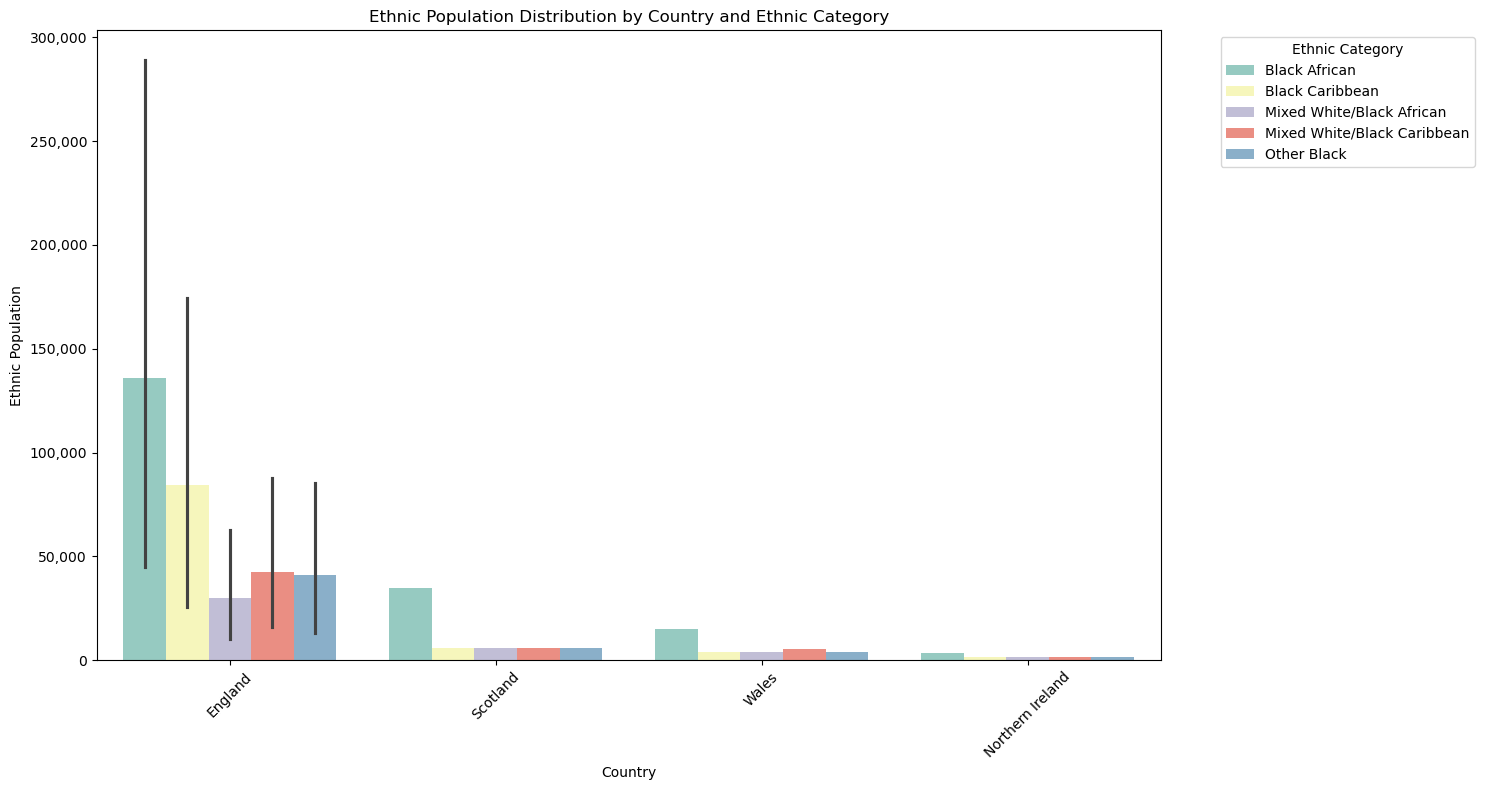

In [1851]:
# First, let's aggregate the data
ethnic_distribution = ethnic_population.groupby(['Country', 'Region', 'Ethnic Category'])['Ethnic Population'].sum().reset_index()

# Calculate total population per country for sorting
country_totals = ethnic_distribution.groupby('Country')['Ethnic Population'].sum().sort_values(ascending=False)
country_order = country_totals.index

# Create a figure
plt.figure(figsize=(15, 8))

# Create the grouped bar plot using seaborn with ordered countries
sns.barplot(data=ethnic_distribution,
            x='Country',
            y='Ethnic Population',
            hue='Ethnic Category',
            palette='Set3',
            order=country_order)  # Add this line to specify the order

# Customize the plot
plt.title('Ethnic Population Distribution by Country and Ethnic Category')
plt.xlabel('Country')
plt.ylabel('Ethnic Population')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Adjust legend
plt.legend(title='Ethnic Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add comma separator to y-axis values
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

Looking at the original table, the black vertical bars in the plot likely represent the variation in ethnic population numbers across different cities within each country. Since the data is grouped by country in the plot, but the original data has city-level information, the error bars show the spread of population values across different cities in each country.<br>

For example, in England, the data includes populations from multiple cities (like Greater London and others), so the error bars show how much these population numbers vary between cities. The larger error bars for England make sense because it likely has more cities with more varying population sizes compared to other countries in the dataset.<br>

This explains why England shows the largest error bars - it probably has the most cities and the biggest variations in ethnic populations between those cities. In contrast, countries like Northern Ireland, which might have fewer cities in the dataset, show smaller or minimal error bars because there's less city-to-city variation to display.

##### Key Insights:

- Geographic Distribution:<br>
    England shows significantly higher populations across all ethnic categories
    Scotland has the second-largest populations, but significantly lower than England
    Wales and Northern Ireland show relatively small ethnic populations
    This aligns with known demographic patterns in the UK

- Ethnic Category Patterns:<br>
    Black African (mint green) represents the largest ethnic group in most countries
    Black Caribbean (light yellow) is the second largest group, particularly in England
    Mixed ethnicities (White/Black African and White/Black Caribbean) show similar proportions
    "Other Black" category shows consistent presence across regions

- Notable Observations:<br>
    England's Black African population (~135,000) is substantially larger than other groups
    England's Black Caribbean population (~85,000) forms a significant second group
    Mixed ethnicity populations are more prevalent in England than other countries
    Scotland shows a notable Black African population but much smaller than England
    Wales and Northern Ireland show much smaller but still measurable ethnic populations

- Proportional Distribution:<br>
    England accounts for approximately 80-85% of the total ethnic population
    The distribution pattern suggests concentrated urban settlements
    Mixed ethnicity categories suggest established communities with intergenerational presence

***

##### FACTOR 2: INMIGRATION:

In [1852]:
immigration = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/inmigration_to_uk.csv')
immigration.head()

,Country,Ethnic group,Year of arrival in the UK,Population
0,England and Wales,"Black, Black British, Black Welsh, Caribbean o...",Does not apply,0
1,England and Wales,"Black, Black British, Black Welsh, Caribbean o...",Born in the UK,531383
2,England and Wales,"Black, Black British, Black Welsh, Caribbean o...",Arrived before 1951,132
3,England and Wales,"Black, Black British, Black Welsh, Caribbean o...",Arrived 1951 to 1960,1363
4,England and Wales,"Black, Black British, Black Welsh, Caribbean o...",Arrived 1961 to 1970,7573


In [1853]:
immigration['Year of arrival in the UK'].unique()

array(['Does not apply', 'Born in the UK', 'Arrived before 1951',
       'Arrived 1951 to 1960', 'Arrived 1961 to 1970',
       'Arrived 1971 to 1980', 'Arrived 1981 to 1990',
       'Arrived 1991 to 2000', 'Arrived 2001 to 2010',
       'Arrived 2011 to 2013', 'Arrived 2014 to 2016',
       'Arrived 2017 to 2019', 'Arrived 2020 to 2021'], dtype=object)

In [1854]:
# Drop rows where the column equals 'Does not apply' or 'Born in the UK'
inmigration = immigration[~immigration['Year of arrival in the UK'].isin(['Does not apply', 'Born in the UK'])]

# Verify the unique values remaining in the column
print("Remaining arrival periods:")
print(immigration['Year of arrival in the UK'].unique())

Remaining arrival periods:
['Does not apply' 'Born in the UK' 'Arrived before 1951'
 'Arrived 1951 to 1960' 'Arrived 1961 to 1970' 'Arrived 1971 to 1980'
 'Arrived 1981 to 1990' 'Arrived 1991 to 2000' 'Arrived 2001 to 2010'
 'Arrived 2011 to 2013' 'Arrived 2014 to 2016' 'Arrived 2017 to 2019'
 'Arrived 2020 to 2021']


In [1855]:
# Create a dictionary mapping arrival periods to group numbers
arrival_groups = {
    'Arrived before 1951': 1,
    'Arrived 1951 to 1960': 2,
    'Arrived 1961 to 1970': 3,
    'Arrived 1971 to 1980': 4,
    'Arrived 1981 to 1990': 5,
    'Arrived 1991 to 2000': 6,
    'Arrived 2001 to 2010': 7,
    'Arrived 2011 to 2013': 8,
    'Arrived 2014 to 2016': 9,
    'Arrived 2017 to 2019': 10,
    'Arrived 2020 to 2021': 11
}

# Create new column with group numbers
immigration['Arrival_Group'] = immigration['Year of arrival in the UK'].map(arrival_groups)

# Verify the mapping
print("\nVerification of mapping:")
print(immigration[['Year of arrival in the UK', 'Arrival_Group']].drop_duplicates().sort_values('Arrival_Group'))


Verification of mapping:
   Year of arrival in the UK  Arrival_Group
2        Arrived before 1951            1.0
3       Arrived 1951 to 1960            2.0
4       Arrived 1961 to 1970            3.0
5       Arrived 1971 to 1980            4.0
6       Arrived 1981 to 1990            5.0
7       Arrived 1991 to 2000            6.0
8       Arrived 2001 to 2010            7.0
9       Arrived 2011 to 2013            8.0
10      Arrived 2014 to 2016            9.0
11      Arrived 2017 to 2019           10.0
12      Arrived 2020 to 2021           11.0
0             Does not apply            NaN
1             Born in the UK            NaN


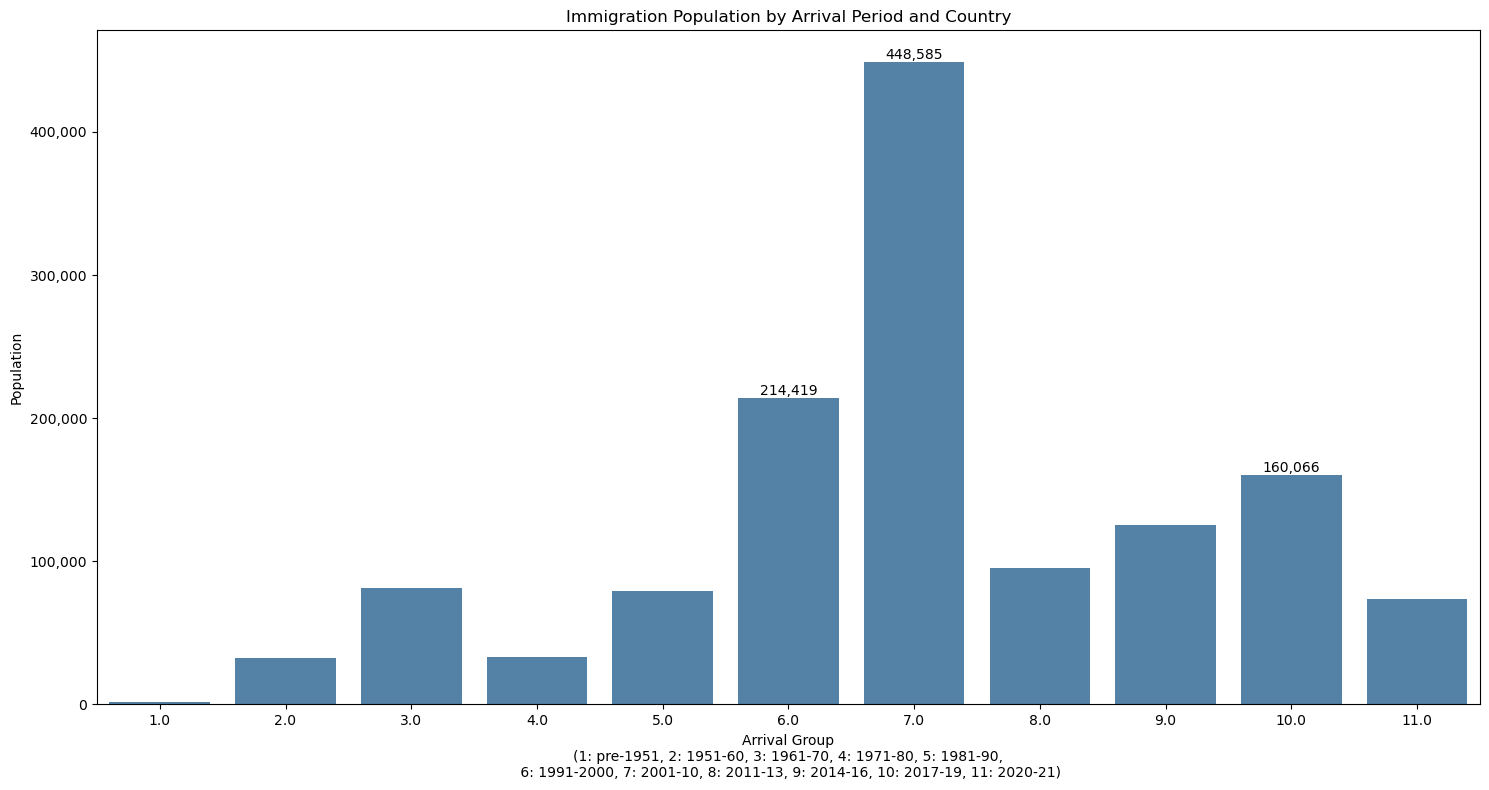

In [1856]:
# Aggregate population by arrival group and country
population_by_group = immigration.groupby(['Country', 'Arrival_Group'])['Population'].sum().reset_index()

# Create the visualization
plt.figure(figsize=(15, 8))

# Create grouped bar plot
ax = sns.barplot(data=population_by_group, 
                x='Arrival_Group', 
                y='Population',
                color='steelblue')

# Add values for top 3 bars
top_3_groups = population_by_group.nlargest(3, 'Population')
for idx in top_3_groups.index:
    value = top_3_groups.loc[idx, 'Population']
    group = top_3_groups.loc[idx, 'Arrival_Group']
    plt.text(group-1, value, f'{value:,.0f}', 
             ha='center', va='bottom')

# Customize the plot
plt.title('Immigration Population by Arrival Period and Country')
plt.xlabel('Arrival Group\n(1: pre-1951, 2: 1951-60, 3: 1961-70, 4: 1971-80, 5: 1981-90,\n 6: 1991-2000, 7: 2001-10, 8: 2011-13, 9: 2014-16, 10: 2017-19, 11: 2020-21)')
plt.ylabel('Population')

# Format y-axis with comma separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Rotate x-axis labels if needed
plt.xticks(rotation=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

##### Key Insights:

- Peak Immigration Period:<br>
    Group 7 (2001-2010) shows the highest immigration numbers with 448,585 arrivals
    This represents a significant spike compared to all other periods
    Suggests major immigration policy changes or global events influencing migration patterns

- Secondary Peak:<br>
    Group 6 (1991-2000) shows the second-highest numbers with 214,419 arrivals
    Indicates a building trend that led to the 2001-2010 peak
    Represents a significant increase from previous decades

- Recent Trends:<br>
    Group 10 (2017-2019) shows a notable population of 160,066 immigrants
    Recent periods maintain relatively high numbers compared to pre-1990 periods
    Suggests sustained immigration levels in recent years

- Historical Pattern:<br>
    Groups 1-5 (pre-1951 through 1990) show consistently lower numbers
    Early periods (Groups 1-2) show minimal immigration
    Gradual increase through Groups 3-5, but still significantly lower than recent periods

- Temporal Evolution:<br>
    Clear upward trend from 1951 to 2010
    Post-2010 shows a decrease from the peak but maintains higher levels than pre-1990
    Most recent period (Group 11, 2020-2021) shows lower numbers, possibly due to COVID-19 pandemic

##### Age ranges for the top 3 immigration groups as of 2024:

- Group 7 (2001-2010) - 448,585 people:<br>
Arrived 14-23 years ago

    If they arrived as:<br>
    Young adults (20-30): Now 34-53 years old<br>
    **Middle-aged (31-50): Now 45-73 years old**<br>
    Children (under 18): Now 18-41 years old<br>
    This represents likely the most economically active group currently<br>
    Many would have established families and careers in the UK<br>

- Group 6 (1991-2000) - 214,419 people:<br>
    Arrived 24-33 years ago<br>

    If they arrived as:<br>
    Young adults (20-30): Now 44-63 years old<br>
    Middle-aged (31-50): Now 55-83 years old<br>
    Children (under 18): Now 28-51 years old<br>
    Many in this group would be in senior career positions or approaching retirement<br>
    Likely to have well-established community ties<br>

- Group 10 (2017-2019) - 160,066 people:<br>
    Arrived 5-7 years ago<br>

    If they arrived as:<br>
    Young adults (20-30): Now 25-37 years old<br>
    Middle-aged (31-50): Now 36-57 years old<br>
    Children (under 18): Now 5-25 years old<br>
    Represents the most recently established significant group<br>
    Likely still in period of career development and community integration<br>
    Includes young families and professionals<br>

***

##### FACTOR 3: CLINICAL TRIALS: 
- The approximate number of individuals in each city who are eligible to participate in the Inaxaplin clinical trial. This population is generally made up of individuals with kidney disease associated with the APOL1 genetic variants, which are prevalent in people of African and Caribbean descent.

##### Inaxaplin (formerly known as VX-147) is a drug developed by Vertex Pharmaceuticals, primarily intended for treating APOL1-mediated focal segmental glomerulosclerosis (FSGS), a kidney disease caused by mutations in the APOL1 gene.
##### The JUSTICE clinical trial is designed to evaluate whether baricitinib, a Janus kinase (JAK) inhibitor, can slow the progression of kidney disease associated with APOL1 gene variants. APOL1 gene variants are linked to certain kidney diseases, including Focal Segmental Glomerulosclerosis (FSGS) and hypertension-associated chronic kidney disease (HTN-CKD).

In [1857]:
# read the dataset
clinical_trials = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/clinical_trials.csv')
clinical_trials.head()

,City,Region,Target Population - Inaxaplin,Target Population - JUSTICE,Clinical Trial Name,Clinical Trial Type
0,London,Greater London,"500-1,000","500-1,000","Inaxaplin, JUSTICE",Both
1,Manchester,North West England,300-700,200-500,"Inaxaplin, JUSTICE",Both
2,Birmingham,West Midlands,400-800,300-600,"Inaxaplin, JUSTICE",Both
3,Leeds,Yorkshire and the Humber,250-500,150-400,"Inaxaplin, JUSTICE",Both
4,Liverpool,North West England,300-600,200-400,"Inaxaplin, JUSTICE",Both


In [1858]:
# check data types and data inconsistency
clinical_trials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   City                           15 non-null     object
 1   Region                         15 non-null     object
 2   Target Population - Inaxaplin  15 non-null     object
 3   Target Population - JUSTICE    15 non-null     object
 4   Clinical Trial Name            15 non-null     object
 5   Clinical Trial Type            15 non-null     object
dtypes: object(6)
memory usage: 852.0+ bytes


In [1859]:
# Strip any leading/trailing spaces from column names (just in case)
clinical_trials.columns = clinical_trials.columns.str.strip()

# Function to split the population range into minimum and maximum values
def split_population_range(pop_range):
    # Remove commas (if any) and split by '-'
    pop_range = pop_range.replace(',', '')
    min_val, max_val = pop_range.split('-')
    
    # Convert to integers
    return int(min_val), int(max_val)

# Apply the function to split the 'Target Population' columns
clinical_trials[['Inaxaplin_min', 'Inaxaplin_max']] = clinical_trials['Target Population - Inaxaplin'].apply(lambda x: pd.Series(split_population_range(x)))
clinical_trials[['JUSTICE_min', 'JUSTICE_max']] = clinical_trials['Target Population - JUSTICE'].apply(lambda x: pd.Series(split_population_range(x)))

# Convert the new columns into integer type (if not already)
clinical_trials[['Inaxaplin_min', 'Inaxaplin_max', 'JUSTICE_min', 'JUSTICE_max']] = clinical_trials[['Inaxaplin_min', 'Inaxaplin_max', 'JUSTICE_min', 'JUSTICE_max']].astype(int)

# Reset the index if needed (this may resolve the indexing issue)
clinical_trials.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
print(clinical_trials[['City', 'Inaxaplin_min', 'Inaxaplin_max', 'JUSTICE_min', 'JUSTICE_max']])

          City  Inaxaplin_min  Inaxaplin_max  JUSTICE_min  JUSTICE_max
0       London            500           1000          500         1000
1   Manchester            300            700          200          500
2   Birmingham            400            800          300          600
3        Leeds            250            500          150          400
4    Liverpool            300            600          200          400
5      Bristol            200            400          100          300
6    Sheffield            250            500          150          400
7   Nottingham            200            400          100          300
8      Glasgow            150            300          100          250
9    Edinburgh            100            250           50          150
10     Cardiff            100            200           50          150
11   Newcastle            100            300           50          150
12    Coventry            150            300          100          200
13    

In [1860]:
clinical_trials.describe()

,Inaxaplin_min,Inaxaplin_max,JUSTICE_min,JUSTICE_max
count,15.000000,15.000000,15.000000,15.000000
mean,216.666667,450.000000,146.666667,343.333333
std,119.023807,235.280987,120.218056,229.024848
min,100.000000,200.000000,50.000000,150.000000
25%,125.000000,300.000000,75.000000,175.000000
50%,200.000000,400.000000,100.000000,300.000000
75%,275.000000,550.000000,175.000000,400.000000
max,500.000000,1000.000000,500.000000,1000.000000


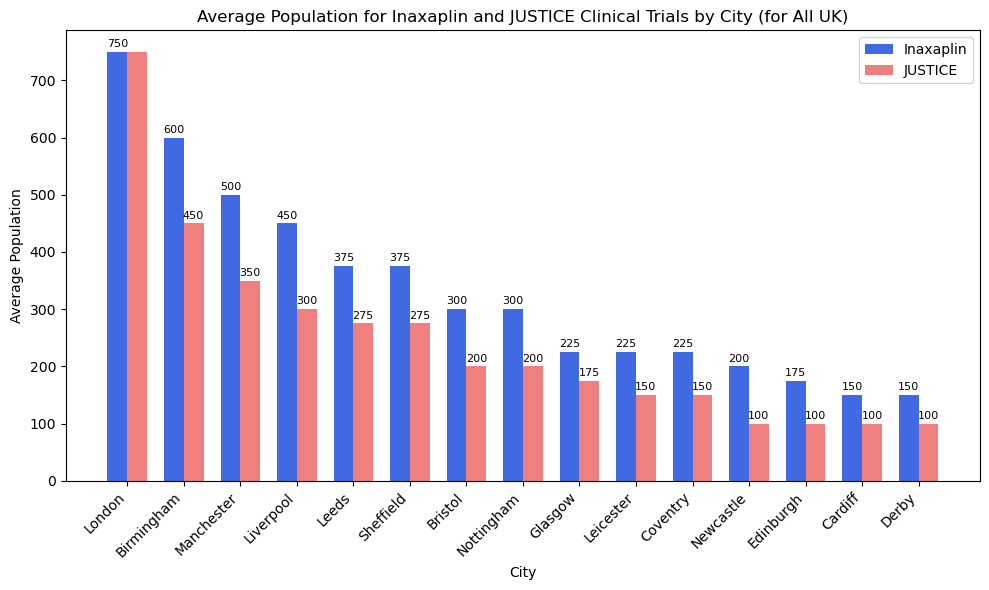

In [1861]:
# Calculate the average population for Inaxaplin and JUSTICE
clinical_trials['Inaxaplin_avg'] = (clinical_trials['Inaxaplin_min'] + clinical_trials['Inaxaplin_max']) / 2
clinical_trials['JUSTICE_avg'] = (clinical_trials['JUSTICE_min'] + clinical_trials['JUSTICE_max']) / 2

# Sort the DataFrame by the average population (Inaxaplin + JUSTICE) in descending order
clinical_trials['Total_avg'] = clinical_trials['Inaxaplin_avg'] + clinical_trials['JUSTICE_avg']
clinical_trials = clinical_trials.sort_values(by='Total_avg', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))

# Position of the bars
bar_width = 0.35
index = range(len(clinical_trials))

# Create combined bar chart
plt.bar(index, clinical_trials['Inaxaplin_avg'], width=bar_width, color='royalblue', label='Inaxaplin')
plt.bar([i + bar_width for i in index], clinical_trials['JUSTICE_avg'], width=bar_width, color='lightcoral', label='JUSTICE')

# Add the value labels on top of the bars, closer to the bars
for i, (inaxaplin_value, justice_value) in enumerate(zip(clinical_trials['Inaxaplin_avg'], clinical_trials['JUSTICE_avg'])):
    # Display only one value when both values are the same
    if inaxaplin_value == justice_value:
        plt.text(i, inaxaplin_value + 5, f'{inaxaplin_value:.0f}', ha='center', va='bottom', color='black', fontsize=8)
    else:
        plt.text(i, inaxaplin_value + 5, f'{inaxaplin_value:.0f}', ha='center', va='bottom', color='black', fontsize=8)  # Inaxaplin label
        plt.text(i + bar_width, justice_value + 5, f'{justice_value:.0f}', ha='center', va='bottom', color='black', fontsize=8)  # JUSTICE label

# Adding labels and title
plt.xlabel('City')
plt.ylabel('Average Population')
plt.title('Average Population for Inaxaplin and JUSTICE Clinical Trials by City (for All UK)')
plt.xticks([i + bar_width / 2 for i in index], clinical_trials['City'], rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

##### This chart shows a key difference in the types of cities used in the Inaxaplin and JUSTICE drug trials.  Inaxaplin primarily focused on much larger cities, while JUSTICE included smaller ones.  This difference matters because city size can influence how patients receive healthcare and their overall health.  

##### The numbers confirm what we see visually: Inaxaplin's average city size was significantly bigger than JUSTICE's.  This raises a question: would the drugs work the same way for people in smaller towns versus big cities?  Because of this difference, we need to be cautious when comparing the results of the two trials directly.  It also means that future studies should try to include a mix of city sizes to ensure the findings apply to everyone, not just those living in large urban areas.


***

##### FACTOR 4: CORRELATED DISEASES WITH APOL1 IN HIGHEST RISK CITIES FOR THE 3 HIGHESTS COUNTRIES WITH ETHNIC POPULATION IN THE UK.

### England

##### Correlated Diseases in England: The estimated cases affected by the correlated diseases with Apol1.

In [1862]:
correlated_disease_england = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_england.csv')

In [1863]:
correlated_disease_england.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Disease                                   32 non-null     object 
 1   Fold Increased Risk                       32 non-null     float64
 2   Risk Type                                 32 non-null     object 
 3   Condition/Context                         32 non-null     object 
 4   Prevalence Percentage                     32 non-null     object 
 5   Prevalence Percentage: Other Ethnicities  32 non-null     object 
 6   Confidence Levels for Prevalence Data     32 non-null     object 
 7   City                                      32 non-null     object 
 8   Region                                    32 non-null     object 
 9   Age Ranges                                32 non-null     object 
 10  Gender                                  

In [1864]:
# Remove % symbol and convert to float
correlated_disease_england['Prevalence Percentage'] = correlated_disease_england['Prevalence Percentage'].str.replace('%', '').astype(float)

correlated_disease_england.head()

,Disease,Fold Increased Risk,Risk Type,Condition/Context,Prevalence Percentage,Prevalence Percentage: Other Ethnicities,Confidence Levels for Prevalence Data,City,Region,Age Ranges,Gender,Estimated Cases
0,HIV-Associated Nephropathy (HIVAN),29.0,Disease,HIV+ population,12.0,<1%*,95% (93-97%),London,Greater London,20-50,All adults,4800
1,HIV-Associated Nephropathy (HIVAN),29.0,Disease,HIV+ population,12.0,<1%*,95% (93-97%),Birmingham,West Midlands,20-50,All adults,1200
2,HIV-Associated Nephropathy (HIVAN),29.0,Disease,HIV+ population,12.0,<1%*,95% (93-97%),Manchester,North West,20-50,All adults,850
3,G1/G1 Genotype,89.0,Genetic,(leave blank if no specific context),10.0,<0.1%,90% (88-92%),London,Greater London,All ages,All adults,86816
4,G1/G1 Genotype,89.0,Genetic,(leave blank if no specific context),10.0,<0.1%,90% (88-92%),Birmingham,West Midlands,All ages,All adults,9600


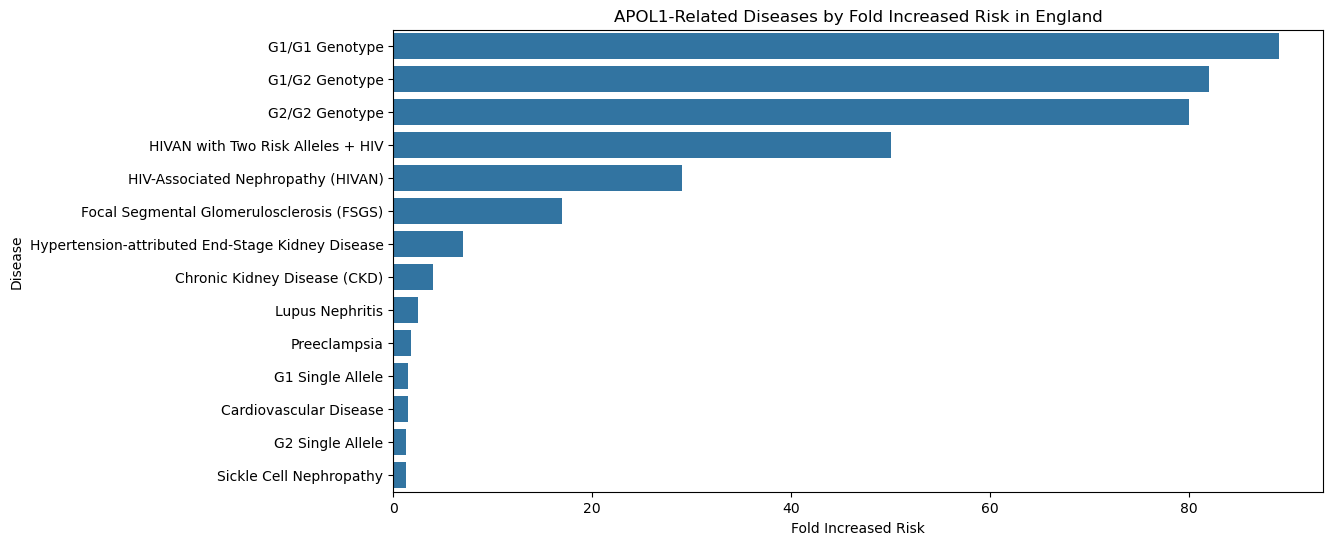

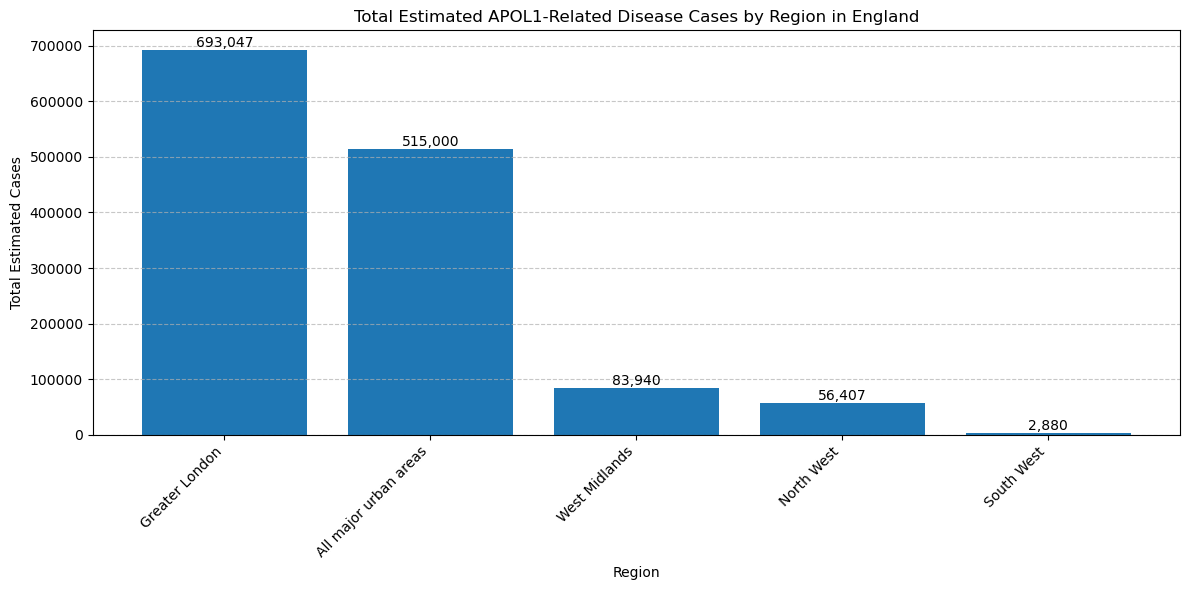

In [1865]:
# First plot
plt.figure(figsize=(12, 6))
sns.barplot(data=correlated_disease_england, 
            x='Fold Increased Risk', 
            y='Disease',
            order=correlated_disease_england.sort_values('Fold Increased Risk', ascending=False)['Disease'])

plt.title('APOL1-Related Diseases by Fold Increased Risk in England')
plt.xlabel('Fold Increased Risk')
plt.ylabel('Disease')
plt.show()

# Second plot modified to show aggregated estimated cases by region
plt.figure(figsize=(12, 6))

# Group by region and sum the estimated cases
region_cases = correlated_disease_england.groupby('Region')['Estimated Cases'].sum().sort_values(ascending=False)

# Create bar plot with aggregated data
bars = plt.bar(region_cases.index, region_cases.values)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

plt.title('Total Estimated APOL1-Related Disease Cases by Region in England')
plt.xlabel('Region')
plt.ylabel('Total Estimated Cases')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### (FIRST GRAPH) KEY INSIGHTS: THIS IS A GENERAL INSIGHT FOR THE GENERAL RISK LEVEL TO BE POSITIVE FOR APOL1 IN ANY AREA.

- Genetic Risk Hierarchy:<br>
- Highest risk variants are genetic:<br>
    G1/G1 Genotype (~89 fold)<br>
    G1/G2 Genotype (~82 fold)<br>
    G2/G2 Genotype (~80 fold)<br>
    These represent the most significant risk multipliers<br>

- Risk Tiers:<br>
- High Risk (>50 fold):<br>
    G1/G1, G1/G2, G2/G2 Genotypes<br>
    HIVAN with Two Risk Alleles + HIV (~50 fold)<br>

- Medium Risk (15-30 fold):<br>
    HIV-Associated Nephropathy (HIVAN) (~29 fold)<br>
    Focal Segmental Glomerulosclerosis (FSGS) (~17 fold)<br>

- Low Risk (<10 fold):<br>
    Hypertension-attributed End-Stage Kidney Disease<br>
    CKD<br>
    Other conditions<br>

##### (SECOND GRAPH) KEY INSIGHTS:

- Regional Distribution:<br>
    Greater London dominates with 693,047 cases<br>
    Significant gap between London and other regions<br>
    Clear urban-rural divide in case numbers<br>

- Hierarchical Pattern:<br>
- Top Regions by Cases:<br>
    Greater London (693,047)<br>
    All major urban areas (515,000)<br>
    West Midlands (83,940)<br>
    North West (56,407)<br>
    South West (2,880)<br>

- Population Concentration:<br>
    Over 51% of cases in Greater London<br>
    Combined London + major urban areas account for ~89% of all cases<br>
    Significant urban concentration of cases<br>

- Geographic Implications:<br>
    Healthcare resource needs highest in London<br>
    Secondary priority for major urban areas<br>
    Lower but significant needs in West Midlands<br>
    Minimal cases in South West<br>

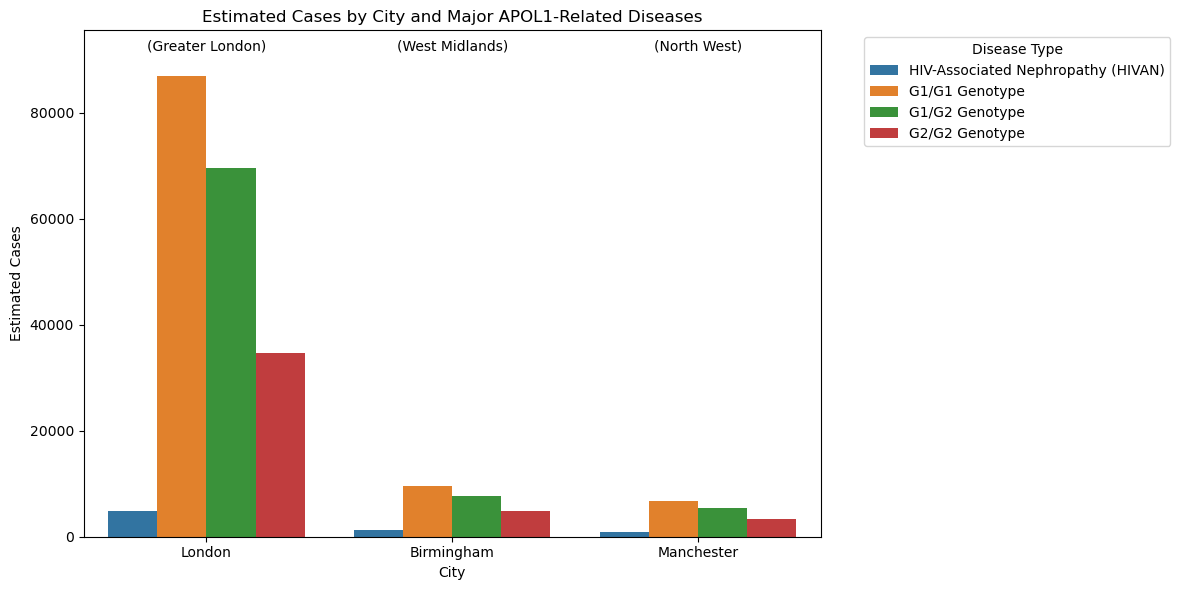

In [1866]:
# Filter for the first 4 diseases
selected_diseases = [
    'HIV-Associated Nephropathy (HIVAN)',
    'G1/G1 Genotype',
    'G1/G2 Genotype',
    'G2/G2 Genotype'
]

# Filter the dataframe
filtered_data = correlated_disease_england[
    correlated_disease_england['Disease'].isin(selected_diseases)
]

# Create figure
plt.figure(figsize=(12, 6))

# Create grouped bar plot with aggregated estimated cases
bars = sns.barplot(data=filtered_data, 
                  x='City', 
                  y='Estimated Cases',
                  hue='Disease',
                  order=['London', 'Birmingham', 'Manchester'])

# Create a dictionary of city-region pairs
city_regions = filtered_data.groupby('City')['Region'].first()

# Add region labels above the bars
for i, city in enumerate(['London', 'Birmingham', 'Manchester']):
    if city in city_regions:
        plt.text(i, plt.ylim()[1], f'({city_regions[city]})',
                ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Estimated Cases by City and Major APOL1-Related Diseases')
plt.xlabel('City')
plt.ylabel('Estimated Cases')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=0)

# Adjust legend
plt.legend(title='Disease Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add some padding at the top for region labels
plt.margins(y=0.1)

# Adjust layout to prevent text cutoff
plt.tight_layout()

# Show plot
plt.show()

##### KEY INSIGHTS:

- Geographic Distribution:<br>
- Greater London:<br>
    Highest number of cases across all genotypes<br>
    G1/G1 Genotype: ~85,000 cases<br>
    G1/G2 Genotype: ~70,000 cases<br>
    G2/G2 Genotype: ~35,000 cases<br>
    HIVAN: ~5,000 cases<br>

- Regional Comparisons:<br>
    Significant gap between London and other cities<br>

- Birmingham (West Midlands):<br>
    ~10,000 cases G1/G1<br>
    Similar proportions but lower numbers<br>

- Manchester (North West):<br>
    Slightly lower than Birmingham<br>
    Maintains similar distribution pattern<br>

***

In [1867]:
correlated_disease_london = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_london.csv')
correlated_disease_birmingham = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_birmingham.csv')
correlated_disease_manchester = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_manchester.csv')

In [1868]:
# Delete specified columns
columns_to_drop = ['Prevalence Percentage: Other Ethnicities', 'City', 'Region', 'Age Ranges', 'Gender']

# Drop the columns (using try-except in case some columns don't exist)
for column in columns_to_drop:
    try:
        correlated_disease_london = correlated_disease_london.drop(column, axis=1)
    except KeyError:
        print(f"Column '{column}' not found in the dataset")

# Save the modified dataframe back to CSV
correlated_disease_london.to_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_london.csv', index=False)

# Rename columns
correlated_disease_birmingham.rename(columns={'High Prevalence Areas': 'High Prevalence Boroughs'}, inplace=True)

Column 'Prevalence Percentage: Other Ethnicities' not found in the dataset
Column 'City' not found in the dataset
Column 'Region' not found in the dataset
Column 'Age Ranges' not found in the dataset
Column 'Gender' not found in the dataset


In [1869]:
#Add a 'City' column to each dataframe
correlated_disease_london['City'] = 'London'
correlated_disease_birmingham['City'] = 'Birmingham'
correlated_disease_manchester['City'] = 'Manchester'

# Rename the column
correlated_disease_manchester.rename(columns={'High Prevalence Areas': 'High Prevalence Boroughs'}, inplace=True)

# Combine all dataframes into one
combined_df = pd.concat([correlated_disease_london, correlated_disease_birmingham, correlated_disease_manchester], ignore_index=True)

# Reorder columns to have 'City' as the first column (optional)
# Get all column names
cols = combined_df.columns.tolist()
# Remove 'City' from the list and add it at the beginning
cols.remove('City')
cols = ['City'] + cols

# Reorder the columns
combined_df = combined_df[cols]

# Save the combined dataframe to a new CSV file
combined_df.to_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_cities_england.csv', index=False)

correlated_disease_cities_england = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_cities_england.csv')
correlated_disease_cities_england.head()

,City,Disease,Fold Increased Risk,Risk Type,Condition/Context,Prevalence Percentage,Confidence Levels for Prevalence Data,Estimated Cases,High Prevalence Boroughs,Confidence Levels
0,London,HIV-Associated Nephropathy (HIVAN),29.0,Disease,HIV+ population,12%,95% (93-97%),4800,Southwark,NaN
1,London,G1/G1 Genotype,85.0,Genetic,(leave blank if no specific context),9%,90% (88-92%),86816,Lambeth,NaN
2,London,G2/G2 Genotype,80.0,Genetic,(leave blank if no specific context),5%,90% (86-94%),69453,Newham,NaN
3,London,Focal Segmental Glomerulosclerosis (FSGS),17.0,Disease,with risk alleles,4%,85% (82-88%),34726,Hackney,NaN
4,London,HIVAN with Two Risk Alleles + HIV,50.0,Combined,HIV+ with risk alleles,3%,80% (75-85%)*,2400,Greenwich,NaN


In [1870]:
# Remove % symbol and convert to float
correlated_disease_cities_england['Prevalence Percentage'] = correlated_disease_cities_england['Prevalence Percentage'].str.replace('%', '').astype(float)
correlated_disease_cities_england.head()

,City,Disease,Fold Increased Risk,Risk Type,Condition/Context,Prevalence Percentage,Confidence Levels for Prevalence Data,Estimated Cases,High Prevalence Boroughs,Confidence Levels
0,London,HIV-Associated Nephropathy (HIVAN),29.0,Disease,HIV+ population,12.0,95% (93-97%),4800,Southwark,NaN
1,London,G1/G1 Genotype,85.0,Genetic,(leave blank if no specific context),9.0,90% (88-92%),86816,Lambeth,NaN
2,London,G2/G2 Genotype,80.0,Genetic,(leave blank if no specific context),5.0,90% (86-94%),69453,Newham,NaN
3,London,Focal Segmental Glomerulosclerosis (FSGS),17.0,Disease,with risk alleles,4.0,85% (82-88%),34726,Hackney,NaN
4,London,HIVAN with Two Risk Alleles + HIV,50.0,Combined,HIV+ with risk alleles,3.0,80% (75-85%)*,2400,Greenwich,NaN


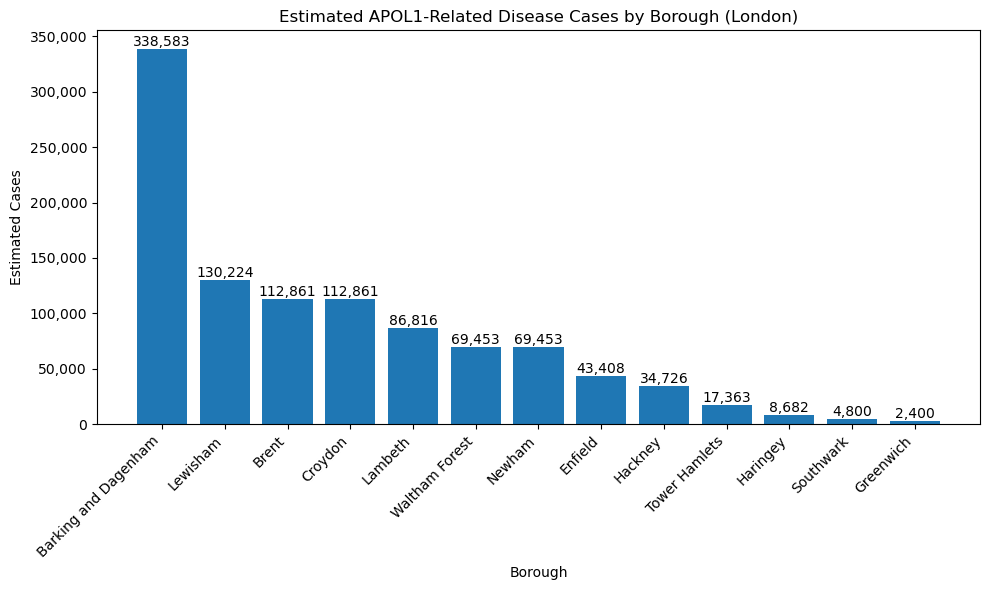

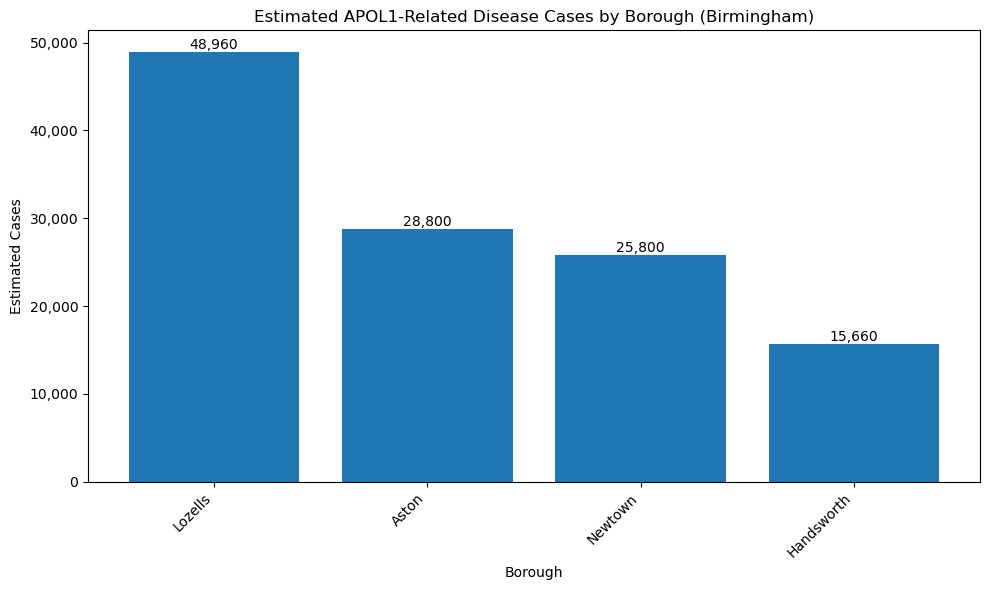

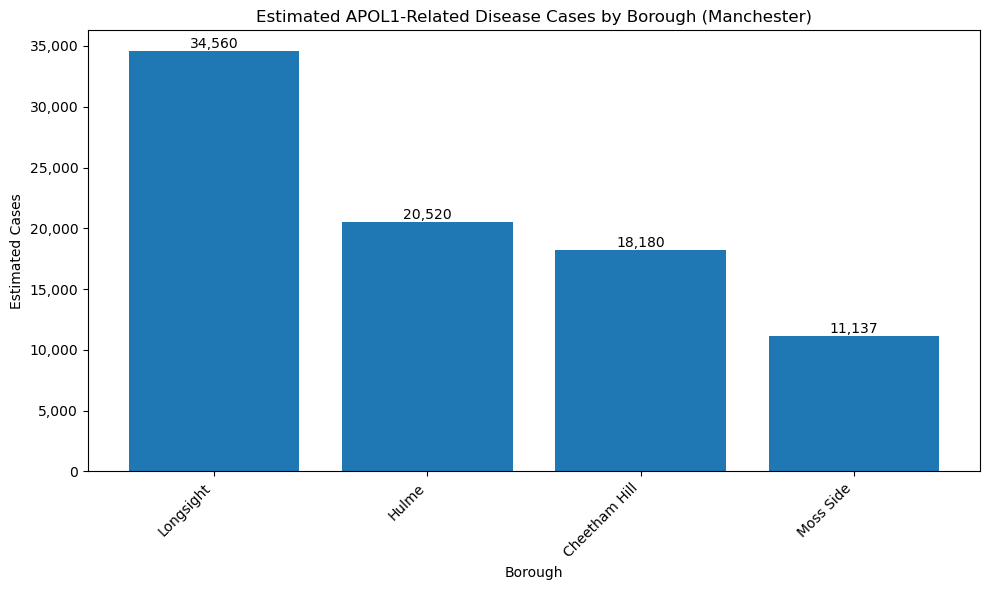

In [1871]:
def create_city_plot(data, city):
    """
    Create a bar plot for a specific city's disease cases by borough
    
    Parameters:
    data (DataFrame): The filtered dataframe for the specific city
    city (str): The name of the city for the plot title
    """
    plt.figure(figsize=(10, 6))
    
    # Group data by borough and sum the estimated cases
    df_aggregated = data.groupby('High Prevalence Boroughs')['Estimated Cases'].sum().reset_index()
    
    # Sort aggregated data by estimated cases in descending order
    df_sorted = df_aggregated.sort_values('Estimated Cases', ascending=False)
    
    # Create bar plot
    bars = plt.bar(df_sorted['High Prevalence Boroughs'], df_sorted['Estimated Cases'])
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')
    
    # Customize the plot
    plt.title(f'Estimated APOL1-Related Disease Cases by Borough ({city})')
    plt.xlabel('Borough')
    plt.ylabel('Estimated Cases')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Format y-axis with comma separator
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    # Adjust layout to prevent text cutoff
    plt.tight_layout()

try:
    # List of cities to create plots for
    cities = ['London', 'Birmingham', 'Manchester']
    
    # Create a plot for each city
    for city in cities:
        # Filter data for the current city
        city_data = correlated_disease_cities_england[correlated_disease_cities_england['City'] == city]
        
        if city_data.empty:
            print(f"No data found for {city}")
            continue
            
        # Create the plot
        create_city_plot(city_data, city)
        plt.show()

except KeyError as e:
    print(f"Column error: {str(e)}")
except Exception as e:
    print(f"An unexpected error occurred: {str(e)}")

##### (FIRST GRAPH) KEY INSIGHTS:

- Borough Distribution:<br>
- Top 5 Boroughs:<br>
    Barking and Dagenham: 338,583 cases<br>
    Lewisham: 130,224 cases<br>
    Brent: 112,861 cases<br>
    Croydon: 112,861 cases<br>
    Lambeth: 86,816 cases<br>

- Geographic Patterns:<br>
    Outer East London dominance (Barking and Dagenham)<br>
    Strong South London presence (Lewisham, Croydon)<br>
    North-West concentration (Brent)<br>
    Significant variation between boroughs<br>

- Case Load Tiers:<br>
- High Case Load (>100,000):<br>
    Barking and Dagenham<br>
    Lewisham<br>
    Brent<br>
    Croydon<br>

- Medium Case Load (50,000-100,000):<br>
    Lambeth<br>
    Waltham Forest<br>
    Newham<br>

- Low Case Load (<50,000):<br>
    Enfield<br>
    Hackney<br>
    Tower Hamlets<br>
    Haringey<br>
    Southwark<br>
    Greenwich<br>

##### (SECOND GRAPH) KEY INSIGHTS:

- Borough Distribution:<br>
- Ranked by Cases:<br>
    Lozells: 48,960 cases<br>
    Aston: 28,800 cases<br>
    Newtown: 25,800 cases<br>
    Handsworth: 15,660 cases<br>

- Scale Comparison:<br>
    Lozells has nearly double the cases of second-ranked Aston<br>
    Clear step-down pattern from highest to lowest<br>
    Total across these 4 boroughs: ~119,220 cases<br>

- Geographic Pattern:<br>
    Inner city concentration<br>
    Adjacent boroughs showing high numbers<br>
    Forms a contiguous area of high prevalence<br>
    Concentrated in north/central Birmingham<br>

- Service Implications:<br>
    Primary Focus (>40,000 cases):<br>
    Lozells requires major healthcare infrastructure<br>
    Secondary Hubs (20,000-30,000 cases):<br>
    Aston and Newtown need substantial facilities<br>


##### (THIRD GRAPH) KEY INSIGHTS:

- Borough Distribution:<br>
- Ranked by Cases:<br>
    Longsight: 34,560 cases<br>
    Hulme: 20,520 cases<br>
    Cheetham Hill: 18,180 cases<br>
    Moss Side: 11,137 cases<br>

- Case Load Pattern:<br>
    Clear hierarchical distribution<br>
    Longsight significantly higher than others<br>
    Total across 4 boroughs: ~84,397 cases<br>
    Progressive decrease between each borough<br>

- Geographic Characteristics:<br>
    Inner city concentration<br>
    South Manchester dominance (Longsight)<br>
    Central areas (Hulme) showing significant numbers<br>
    Traditional diverse communities<br>

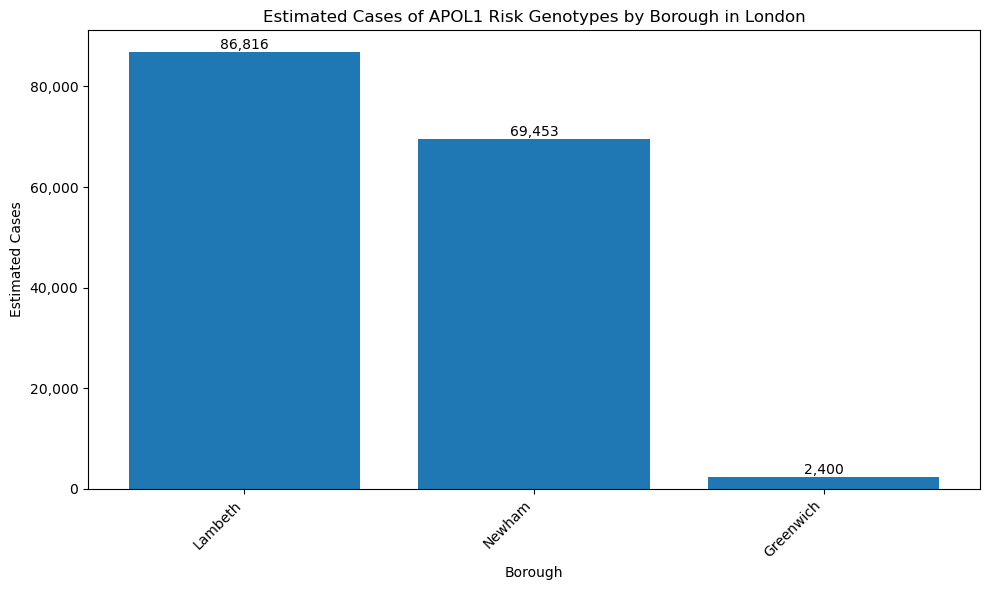

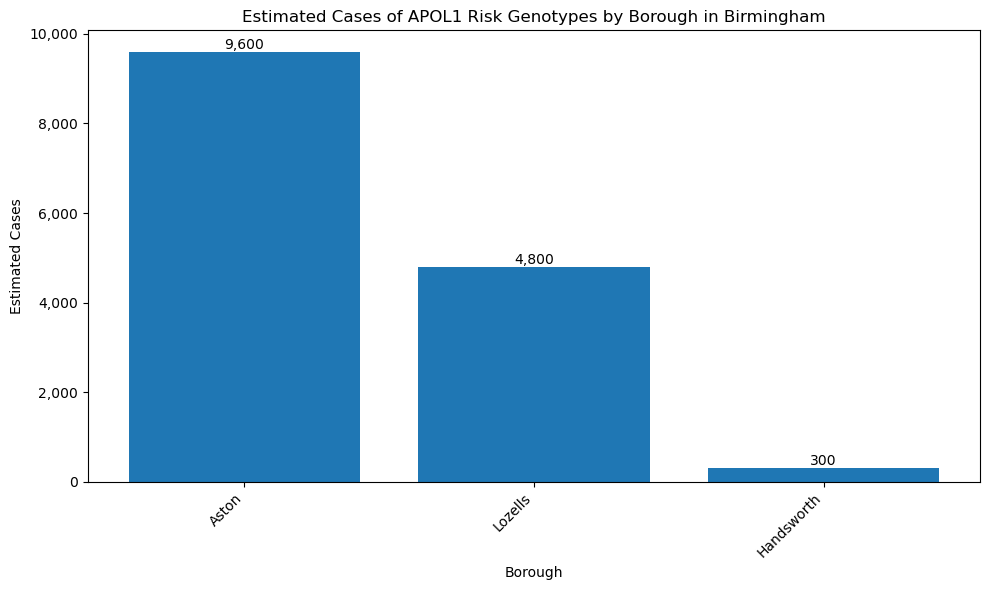

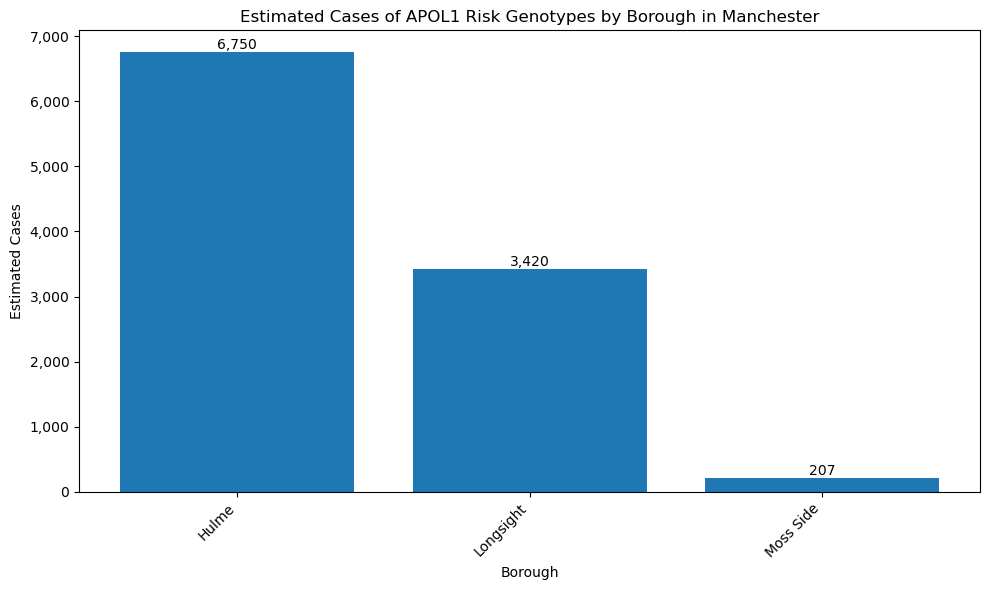

In [1872]:
def create_genotype_plot(data, city):
    """
    Create a bar plot for APOL1 risk genotypes by borough for a specific city
    
    Parameters:
    data (DataFrame): The filtered dataframe for the specific city
    city (str): The name of the city for the plot title
    """
    plt.figure(figsize=(10, 6))
    
    # Filter for specific conditions
    selected_conditions = [
        'G1/G1 Genotype',
        'G1/G2 Genotype', 
        'G2/G2 Genotype',
        'HIVAN with Two Risk Alleles + HIV'
    ]
    
    # Filter dataframe
    df_filtered = data[data['Disease'].isin(selected_conditions)]
    
    # Group and sum the filtered data
    df_aggregated = df_filtered.groupby('High Prevalence Boroughs')['Estimated Cases'].sum().reset_index()
    
    # Sort data by estimated cases in descending order
    df_sorted = df_aggregated.sort_values('Estimated Cases', ascending=False)
    
    # Create bar plot
    bars = plt.bar(df_sorted['High Prevalence Boroughs'], df_sorted['Estimated Cases'])
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')
    
    # Customize the plot
    plt.title(f'Estimated Cases of APOL1 Risk Genotypes by Borough in {city}')
    plt.xlabel('Borough')
    plt.ylabel('Estimated Cases')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Format y-axis with comma separator
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    # Adjust layout to prevent text cutoff
    plt.tight_layout()

try:
    # List of cities to create plots for
    cities = ['London', 'Birmingham', 'Manchester']
    
    # Create a plot for each city
    for city in cities:
        # Filter data for the current city
        city_data = correlated_disease_cities_england[correlated_disease_cities_england['City'] == city]
        
        if city_data.empty:
            print(f"No data found for {city}")
            continue
        
        # Create the plot
        create_genotype_plot(city_data, city)
        plt.show()

except KeyError as e:
    print(f"Column error: {str(e)}")
except Exception as e:
    print(f"An unexpected error occurred: {str(e)}")

##### (FIRST GRAPH) KEY INSIGHTS:

- Borough Distribution:<br>
- Ranked by Cases:<br>
    Lambeth: 86,816 cases<br>
    Newham: 69,453 cases<br>
    Greenwich: 2,400 cases<br>

- Scale Disparities:<br>
    Dramatic difference between top and bottom boroughs<br>
    Lambeth and Newham relatively close in scale<br>
    Greenwich significantly lower<br>
    ~84,416 case difference between highest and lowest<br>

- Geographic Pattern:<br>
    Strong South London presence (Lambeth)<br>
    East London significance (Newham)<br>
    South-East London minimal (Greenwich)<br>
    Clear north-south and east-west variations<br>

- Service Implications:<br>
- Major Centers (>60,000 cases):<br>
    Lambeth and Newham require comprehensive facilities<br>
    Primary testing and treatment centers<br>
    Full-service genetic clinics<br>

##### (SECOND GRAPH) KEY INSIGHTS:

- Borough Distribution:<br>
- Ranked by Cases:<br>
    Aston: 9,600 cases<br>
    Lozells: 4,800 cases<br>
    Handsworth: 300 cases<br>

- Scale Characteristics:<br>
    Aston doubles Lozells' cases<br>
    Dramatic drop to Handsworth<br>
    Total cases across boroughs: 14,700<br>
    Clear hierarchical distribution<br>

- Geographic Pattern:<br>
    Inner city concentration (Aston)<br>
    Adjacent areas showing variation<br>
    Significant north-south divide<br>
    Connected geographic areas<br>

##### (THIRD GRAPH) KEY INSIGHTS:

- Borough Distribution:<br>
- Ranked by Cases:<br>
    Hulme: 6,750 cases<br>
    Longsight: 3,420 cases<br>
    Moss Side: 207 cases<br>

- Scale Characteristics:<br>    
    Hulme has nearly double Longsight's cases<br>
    Dramatic drop to Moss Side<br>
    Total cases across boroughs: 10,377<br>
    Clear three-tier distribution<br>

- Geographic Pattern:<br>
    Central Manchester dominance (Hulme)<br>
    South Manchester significance (Longsight)<br>
    Traditional diverse area (Moss Side) showing lower numbers<br>
    Connected geographic areas

INSIGHTS COMPARING WITH IMMIGRATION DATA:

Looking at the immigration data from 2001-2010 and disease prevalence data from 2021 (approximately 10-20 years later), we can observe:<br>

- Time Relationship:<br>
    People who immigrated during 2001-2010 would be part of the population measured in the 2021 disease prevalence data<br>
    This time gap allows for disease development and diagnosis<br>
    The age ranges in the disease data (15-60, 20-50) would include many of these immigrants who arrived in 2001-2010<br>

- Geographical Correlation:<br>
    London shows highest numbers in both datasets:<br>
    Highest immigration numbers in 2001-2010<br>
    Highest estimated cases in 2021 (e.g., HIVAN: 4,800 cases, G1/G1 Genotype: 86,816 cases)<br>
    Birmingham and Manchester follow with proportionally lower numbers in both datasets<br>

- Age Consideration:<br>
    Immigrants who arrived in 2001-2010 would be 10-20 years older in 2021<br>
    This aligns with the age ranges where most APOL1-related conditions are prevalent (20-50, 15-60)<br>

- Conclusion:<br>
    There appears to be a positive correlation between 2001-2010 immigration patterns and 2021 disease prevalence, particularly in major urban areas.

***

### Scotland

In [1873]:
correlated_disease_scotland = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_scotland.csv')

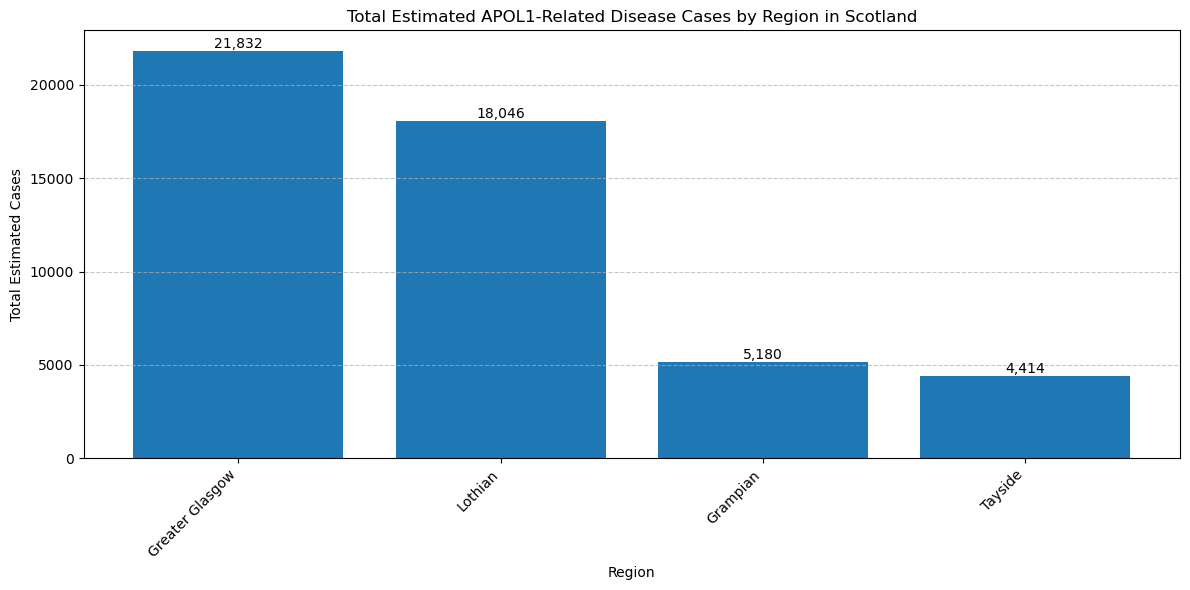

In [1874]:
# Plot modified to show aggregated estimated cases by region
plt.figure(figsize=(12, 6))

# Group by region and sum the estimated cases
region_cases = correlated_disease_scotland.groupby('Region')['Estimated Cases'].sum().sort_values(ascending=False)

# Create bar plot with aggregated data
bars = plt.bar(region_cases.index, region_cases.values)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

plt.title('Total Estimated APOL1-Related Disease Cases by Region in Scotland')
plt.xlabel('Region')
plt.ylabel('Total Estimated Cases')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### KEY INSIGHTS:

- Regional Distribution:<br>
- Ranked by Cases:<br>
    Greater Glasgow: 21,832 cases<br>
    Lothian: 18,046 cases<br>
    Grampian: 5,180 cases<br>
    Tayside: 4,414 cases<br>

- Scale Characteristics:<br>
    Two-tier distribution pattern<br>
    Greater Glasgow/Lothian (>18,000 cases)<br>
    Grampian/Tayside (<6,000 cases)<br>
    Total cases across Scotland: 49,472<br>

- NGeographic Pattern:<br>
    Central Belt dominance (Glasgow/Lothian)<br>
    Lower numbers in northern regions<br>
    Clear urban-rural divide<br>
    Population center correlation

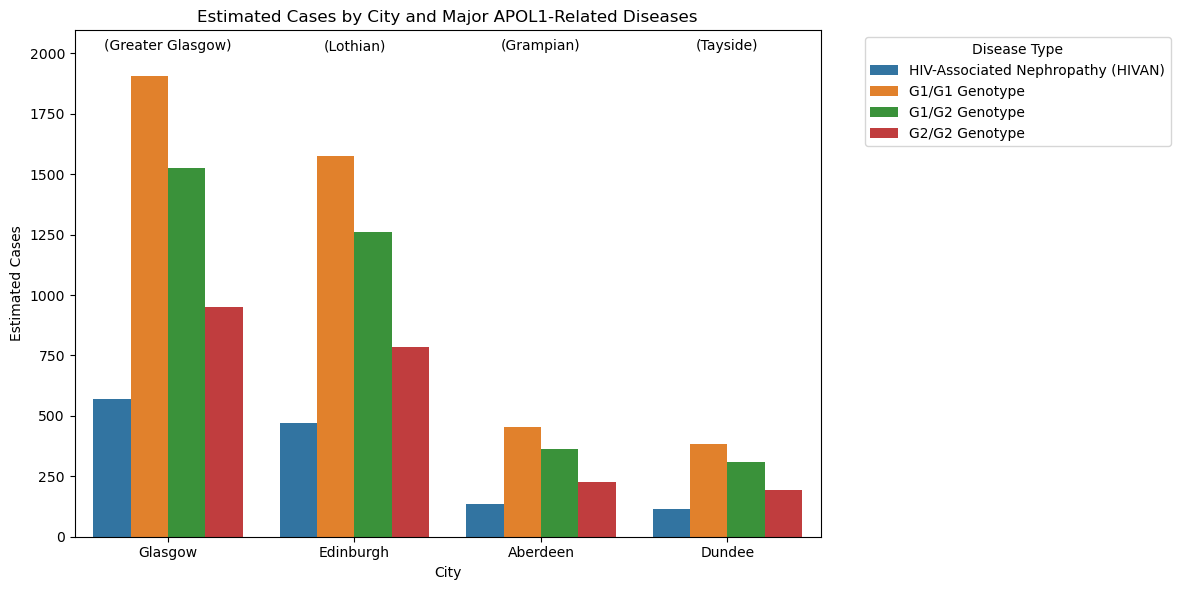

In [1875]:
# Filter for the first 4 diseases
selected_diseases = [
    'HIV-Associated Nephropathy (HIVAN)',
    'G1/G1 Genotype',
    'G1/G2 Genotype',
    'G2/G2 Genotype'
]

# Filter the dataframe
filtered_data = correlated_disease_scotland[
    correlated_disease_scotland['Disease'].isin(selected_diseases)
]

# Create figure
plt.figure(figsize=(12, 6))

# Create grouped bar plot with aggregated estimated cases
bars = sns.barplot(data=filtered_data, 
                  x='City', 
                  y='Estimated Cases',
                  hue='Disease',
                  order=['Glasgow', 'Edinburgh', 'Aberdeen', 'Dundee'])

# Create a dictionary of city-region pairs
city_regions = filtered_data.groupby('City')['Region'].first()

# Add region labels above the bars
for i, city in enumerate(['Glasgow', 'Edinburgh', 'Aberdeen', 'Dundee']):
    if city in city_regions:
        plt.text(i, plt.ylim()[1], f'({city_regions[city]})',
                ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Estimated Cases by City and Major APOL1-Related Diseases')
plt.xlabel('City')
plt.ylabel('Estimated Cases')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=0)

# Adjust legend
plt.legend(title='Disease Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add some padding at the top for region labels
plt.margins(y=0.1)

# Adjust layout to prevent text cutoff
plt.tight_layout()

# Show plot
plt.show()

##### KEY INSIGHTS:

- Regional Pattern:<br>
- Greater Glasgow (Highest Cases):<br>
    G1/G1 Genotype: ~1,900 cases<br>
    G1/G2 Genotype: ~1,500 cases<br>
    G2/G2 Genotype: ~950 cases<br>
    HIVAN: ~570 cases<br>

- Lothian (Edinburgh):<br>
    Similar pattern but lower numbers<br>
    G1/G1: ~1,575 cases<br>
    G1/G2: ~1,260 cases<br>
    G2/G2: ~787 cases<br>
    HIVAN: ~472 cases<br>

- Disease Distribution:<br>
- Consistent Pattern Across Cities:<br>
    G1/G1 highest prevalence<br>
    G1/G2 second highest<br>
    G2/G2 third highest<br>
    HIVAN lowest numbers<br>

- Geographic Scale:<br>
- Clear Hierarchy:<br>
    Glasgow/Edinburgh (major centers)<br>
    Aberdeen (medium scale)<br>
    Dundee (smallest numbers)<br>

- Service Implications:<br>
- Primary Centers:<br>
    Glasgow: Comprehensive services<br>
    Edinburgh: Full service center<br>

- Secondary Centers:<br>
    Aberdeen: Scaled services<br>
    Dundee: Basic services<br>

In [1876]:
correlated_disease_glasgow = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_glasgow.csv')
correlated_disease_edimburgh = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_edimburgh.csv')
correlated_disease_aberdeen = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_aberdeen.csv')
correlated_disease_dundee = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_dundee.csv')

In [1877]:
#Add a 'City' column to each dataframe
correlated_disease_glasgow['City'] = 'Glasgow'
correlated_disease_edimburgh['City'] = 'Edimburgh'
correlated_disease_aberdeen['City'] = 'Aberdeen'
correlated_disease_dundee['City'] = 'Dundee'

# Combine all dataframes into one
combined_df = pd.concat([correlated_disease_glasgow, correlated_disease_edimburgh, correlated_disease_aberdeen, correlated_disease_dundee], ignore_index=True)

# Reorder columns to have 'City' as the first column (optional)
# Get all column names
cols = combined_df.columns.tolist()
# Remove 'City' from the list and add it at the beginning
cols.remove('City')
cols = ['City'] + cols

# Reorder the columns
combined_df = combined_df[cols]

# Save the combined dataframe to a new CSV file
combined_df.to_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_cities_scotland.csv', index=False)

correlated_disease_cities_scotland = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_cities_scotland.csv')
correlated_disease_cities_scotland.head()

,City,Disease,Fold Increased Risk,Risk Type,Condition/Context,Prevalence Percentage,Confidence Levels,Estimated Cases,High Prevalence Boroughs
0,Glasgow,HIV-Associated Nephropathy (HIVAN),29.0,Disease,HIV+ population,10.0,92% (90-94%),570,Pollokshields
1,Glasgow,G1/G1 Genotype,89.0,Genetic,African ancestry,9.0,88% (86-90%),1905,Pollokshields
2,Glasgow,G2/G2 Genotype,80.0,Genetic,African ancestry,4.0,85% (82-88%),952,Pollokshields
3,Glasgow,Focal Segmental Glomerulosclerosis (FSGS),17.0,Disease,with risk alleles,3.5,85% (82-88%),667,Govanhill
4,Glasgow,HIVAN with Two Risk Alleles + HIV,50.0,Combined,HIV+ with risk alleles,2.5,80% (75-85%)*,476,Govanhill


In [1878]:
correlated_disease_cities_scotland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   City                      52 non-null     object 
 1   Disease                   52 non-null     object 
 2   Fold Increased Risk       52 non-null     float64
 3   Risk Type                 52 non-null     object 
 4   Condition/Context         52 non-null     object 
 5   Prevalence Percentage     52 non-null     float64
 6   Confidence Levels         52 non-null     object 
 7   Estimated Cases           52 non-null     int64  
 8   High Prevalence Boroughs  52 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.8+ KB


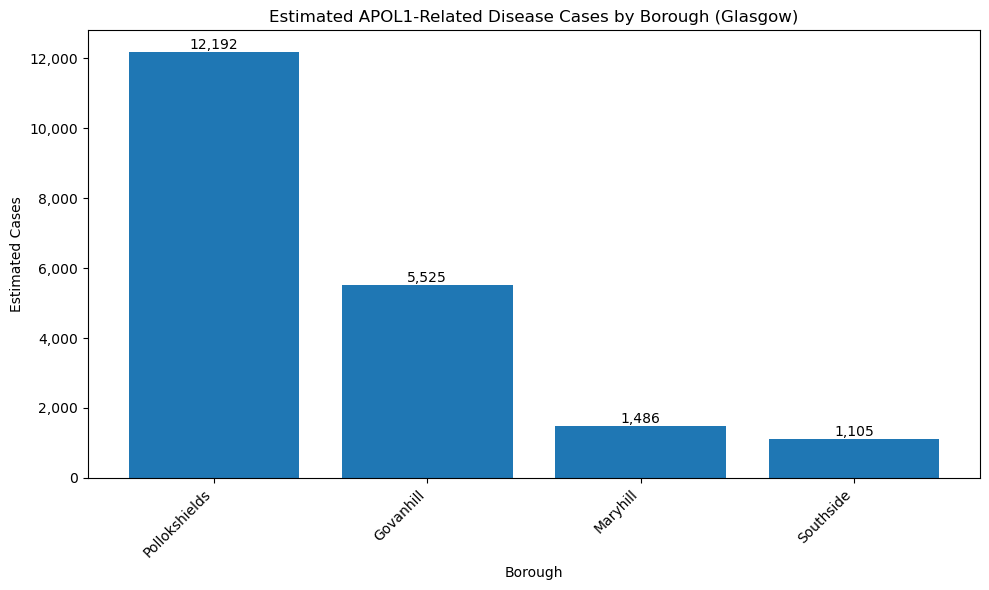

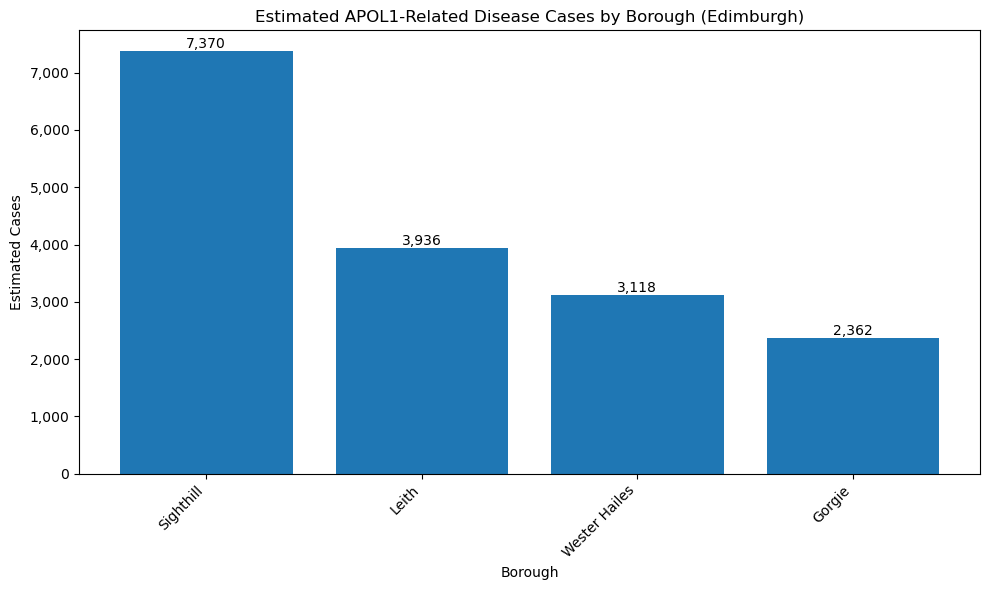

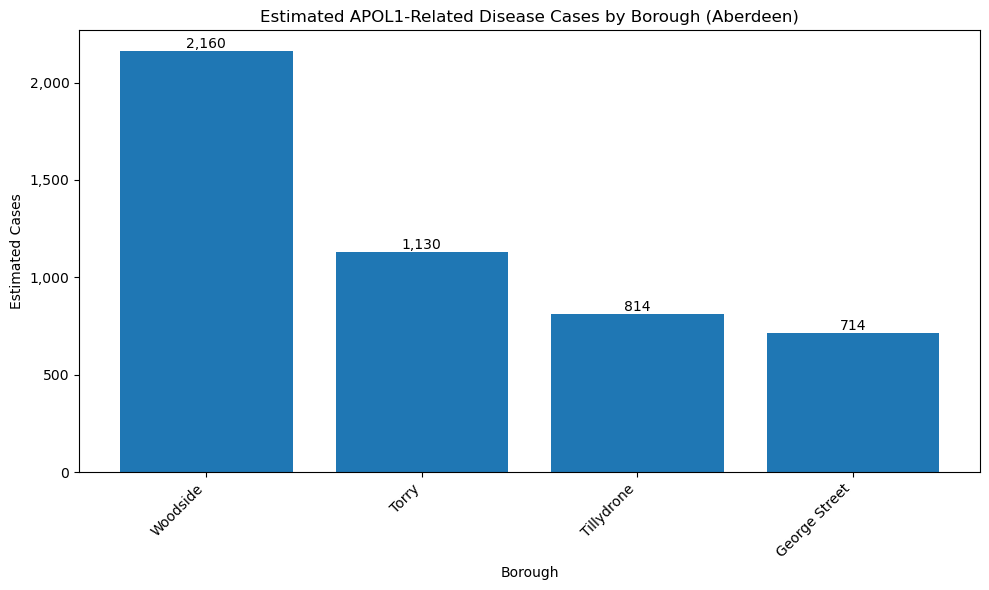

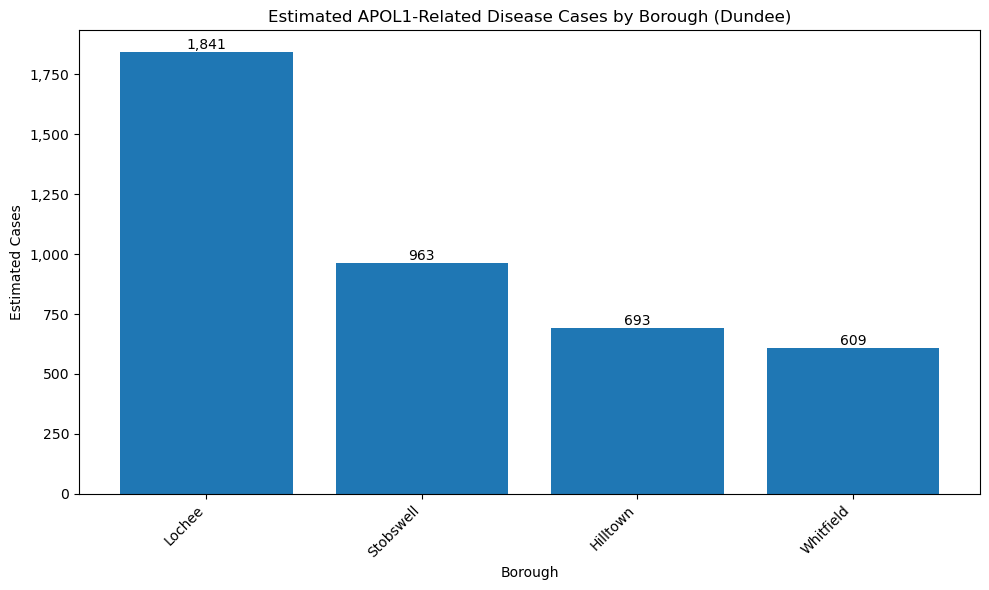

In [1879]:
def create_city_plot(data, city):
    """
    Create a bar plot for a specific city's disease cases by borough
    
    Parameters:
    data (DataFrame): The filtered dataframe for the specific city
    city (str): The name of the city for the plot title
    """
    plt.figure(figsize=(10, 6))
    
    # Group data by borough and sum the estimated cases
    df_aggregated = data.groupby('High Prevalence Boroughs')['Estimated Cases'].sum().reset_index()
    
    # Sort aggregated data by estimated cases in descending order
    df_sorted = df_aggregated.sort_values('Estimated Cases', ascending=False)
    
    # Create bar plot
    bars = plt.bar(df_sorted['High Prevalence Boroughs'], df_sorted['Estimated Cases'])
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')
    
    # Customize the plot
    plt.title(f'Estimated APOL1-Related Disease Cases by Borough ({city})')
    plt.xlabel('Borough')
    plt.ylabel('Estimated Cases')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Format y-axis with comma separator
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    # Adjust layout to prevent text cutoff
    plt.tight_layout()

try:
    # List of cities to create plots for
    cities = ['Glasgow', 'Edimburgh', 'Aberdeen', 'Dundee']
    
    # Create a plot for each city
    for city in cities:
        # Filter data for the current city
        city_data = correlated_disease_cities_scotland[correlated_disease_cities_scotland['City'] == city]
        
        if city_data.empty:
            print(f"No data found for {city}")
            continue
            
        # Create the plot
        create_city_plot(city_data, city)
        plt.show()

except KeyError as e:
    print(f"Column error: {str(e)}")
except Exception as e:
    print(f"An unexpected error occurred: {str(e)}")

#### (FIRST GRAPH) KEY INSIGHTS:

- Borough Distribution:<br>
- Ranked by Cases:<br>
    Pollokshields: 12,192 cases<br>
    Govanhill: 5,525 cases<br>
    Maryhill: 1,486 cases<br>
    Southside: 1,105 cases<br>

- Scale Characteristics:<br>
    Pollokshields dominates with more than double second-highest<br>
    Clear four-tier distribution<br>
    Total cases across boroughs: 20,308<br>
    Significant drop between each tier<br>

- Geographic Pattern:<br>
    South Glasgow concentration (Pollokshields)<br>
    Inner city significance (Govanhill)<br>
    North-South divide evident<br>
    Traditional diverse communities<br>

##### (SECOND GRAPH) KEY INSIGHTS:

- Borough Distribution:<br>
- Ranked by Cases:<br>
    Sighthill: 7,370 cases<br>

- Leith: 3,936 cases<br>
    Wester Hailes: 3,118 cases<br>
    Gorgie: 2,362 cases<br>

- Scale Characteristics:<br>
    Sighthill nearly double second-highest<br>
    More gradual decrease between other boroughs<br>

- Total cases across boroughs: 16,786<br>
    Progressive step-down pattern<br>

- Geographic Pattern:<br>
    Western concentration (Sighthill)<br>
    Port area significance (Leith)<br>
    Peripheral estates (Wester Hailes)<br>
    Inner city presence (Gorgie)<br>

- Service Implications:<br>
- Primary Center (>7,000 cases):<br>
    Sighthill requires main facility<br>
    Comprehensive genetic services<br>
    Full treatment center<br>

- Secondary Hubs (3,000-4,000 cases):<br>
    Leith and Wester Hailes<br>
    Substantial facilities<br>
    Testing capabilities<br>

##### (THIRD GRAPH) KEY INSIGHTS:

- Borough Distribution:<br>
- Ranked by Cases:<br>
    Woodside: 2,160 cases<br>
    Torry: 1,130 cases<br>
    Tillydrone: 814 cases<br>
    George Street: 714 cases<br>

- Scale Characteristics:<br>
    Woodside nearly double second-highest<br>
    Total cases across boroughs: 4,818<br>
    Clear hierarchical pattern<br>
    Smaller gaps between lower-ranked areas<br>

- Geographic Pattern:<br>
    North city concentration (Woodside)<br>
    Harbor area significance (Torry)<br>
    Inner city presence (George Street)<br>
    Traditional diverse communities<br>

##### (FOURTH GRAPH) KEY INSIGHTS:

- Borough Distribution:<br>
- Ranked by Cases:<br>
    Lochee: 1,841 cases (45% of total)<br>

- Stobswell: 963 cases (23% of total)<br>
- Hilltown: 693 cases (17% of total)<br>
- Whitfield: 609 cases (15% of total)<br>
- Pattern Analysis:<br>
    Clear hierarchical distribution<br>

- Total cases: 4,106<br>
    Lochee dominates with nearly half of all cases<br>
    Other three boroughs share remaining cases fairly evenly<br>

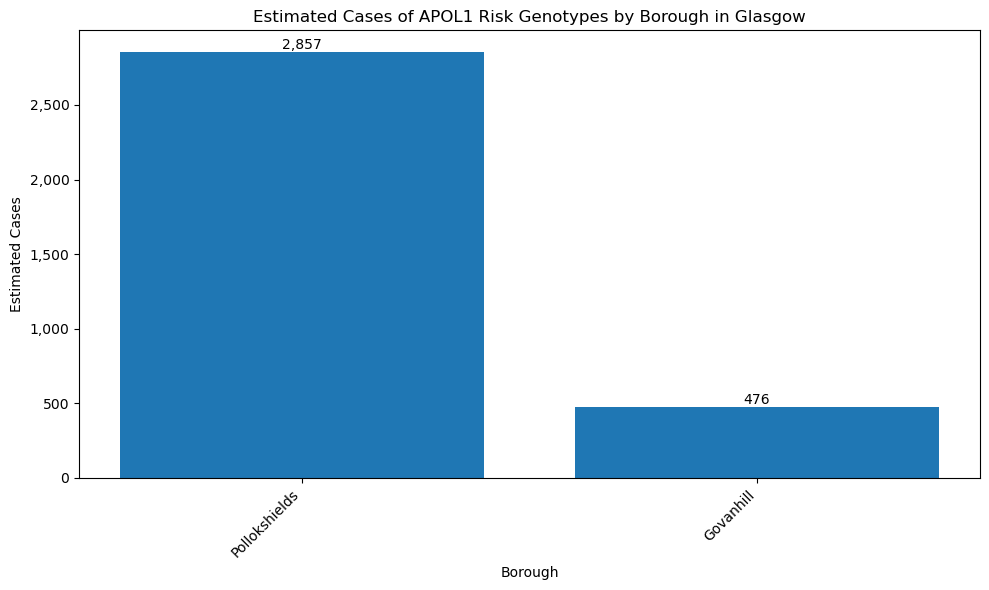

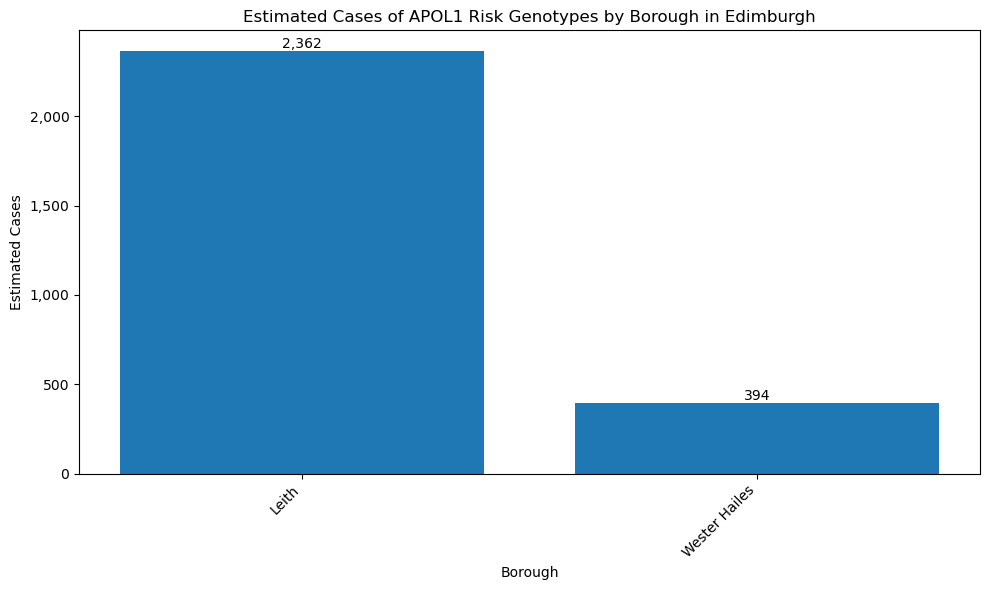

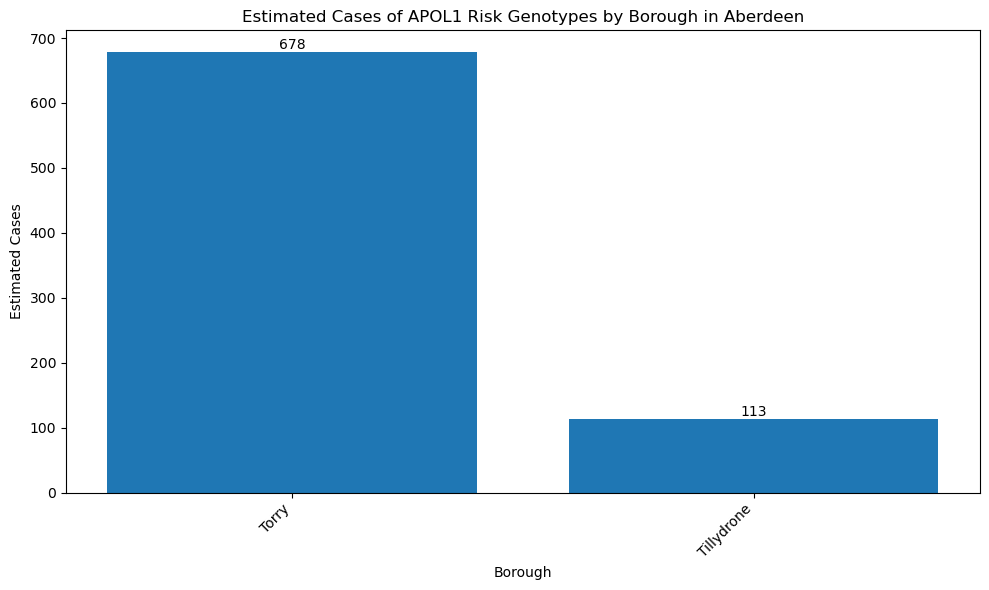

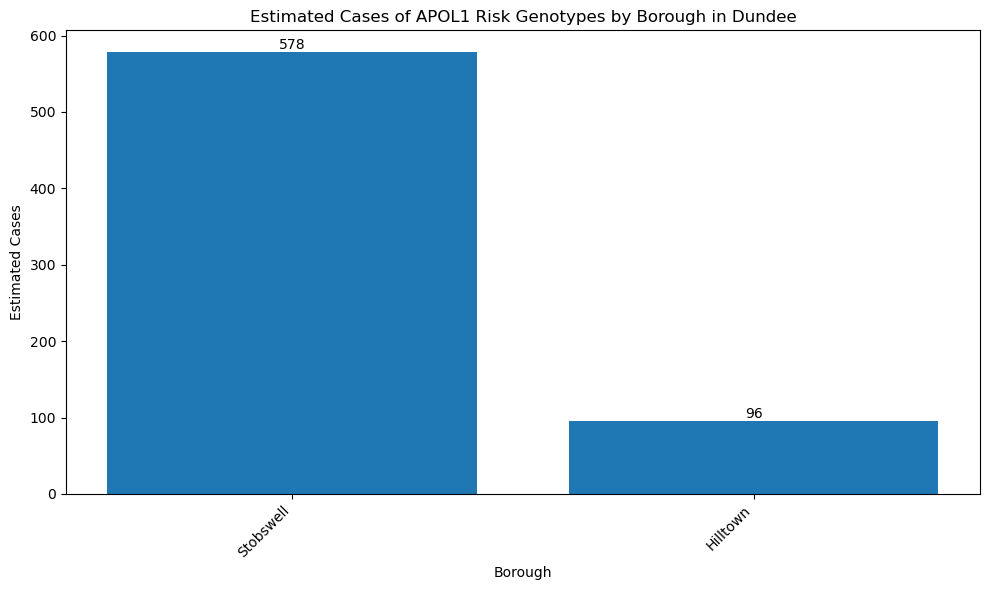

In [1880]:
def create_genotype_plot(data, city):
    """
    Create a bar plot for APOL1 risk genotypes by borough for a specific city
    
    Parameters:
    data (DataFrame): The filtered dataframe for the specific city
    city (str): The name of the city for the plot title
    """
    plt.figure(figsize=(10, 6))
    
    # Filter for specific conditions
    selected_conditions = [
        'G1/G1 Genotype',
        'G1/G2 Genotype', 
        'G2/G2 Genotype',
        'HIVAN with Two Risk Alleles + HIV'
    ]
    
    # Filter dataframe
    df_filtered = data[data['Disease'].isin(selected_conditions)]
    
    # Group and sum the filtered data
    df_aggregated = df_filtered.groupby('High Prevalence Boroughs')['Estimated Cases'].sum().reset_index()
    
    # Sort data by estimated cases in descending order
    df_sorted = df_aggregated.sort_values('Estimated Cases', ascending=False)
    
    # Create bar plot
    bars = plt.bar(df_sorted['High Prevalence Boroughs'], df_sorted['Estimated Cases'])
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')
    
    # Customize the plot
    plt.title(f'Estimated Cases of APOL1 Risk Genotypes by Borough in {city}')
    plt.xlabel('Borough')
    plt.ylabel('Estimated Cases')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Format y-axis with comma separator
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    # Adjust layout to prevent text cutoff
    plt.tight_layout()

try:
    # List of cities to create plots for
    cities = ['Glasgow', 'Edimburgh', 'Aberdeen', 'Dundee']
    
    # Create a plot for each city
    for city in cities:
        # Filter data for the current city
        city_data = correlated_disease_cities_scotland[correlated_disease_cities_scotland['City'] == city]
        
        if city_data.empty:
            print(f"No data found for {city}")
            continue
        
        # Create the plot
        create_genotype_plot(city_data, city)
        plt.show()

except KeyError as e:
    print(f"Column error: {str(e)}")
except Exception as e:
    print(f"An unexpected error occurred: {str(e)}")

##### (FIRST GRAPH) KEY INSIGHTS:

- Borough Distribution:<br>
    Pollokshields: 2,857 cases (86% of total)<br>
    Govanhill: 476 cases (14% of total)<br>
    Total cases: 3,333<br>

- Scale Disparity:<br>
    Pollokshields has 6 times more cases than Govanhill<br>
    Dramatic concentration in one borough<br>
    Clear primary location identified<br>
    Significant gap between boroughs

##### (SECOND GRAPH) KEY INSIGHTS:

- Borough Distribution:<br>
    Leith: 2,362 cases (86% of total)<br>
    Wester Hailes: 394 cases (14% of total)<br>
    Total cases: 2,756<br>

- Scale Disparity:<br>
    Leith has 6 times more cases than Wester Hailes<br>
    Major concentration in port area<br>
    Clear primary location identified<br>
    Significant gap between boroughs

##### (THIRD GRAPH) KEY INSIGHTS:

- Borough Distribution:<br>
    Torry: 678 cases (86% of total)<br>
    Tillydrone: 113 cases (14% of total)<br>
    Total cases: 791<br>

- Scale Disparity:<br>
    Torry has 6 times more cases than Tillydrone<br>
    Major concentration in harbor area<br>
    Significant gap between boroughs<br>
    Much smaller total numbers than Edinburgh/Glasgow

##### (FOURTH GRAPH) KEY INSIGHTS:

- Borough Distribution:<br>
    Stobswell: 578 cases (86% of total)<br>
    Hilltown: 96 cases (14% of total)<br>

- Total cases: 674<br>
- Scale Disparity:<br>
    Stobswell has 6 times more cases than Hilltown<br>
    Smallest total cases among Scottish cities<br>
    Clear concentration in one area<br>
    Significant gap between boroughs

***

### Wales

In [1881]:
correlated_disease_wales = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_wales.csv')

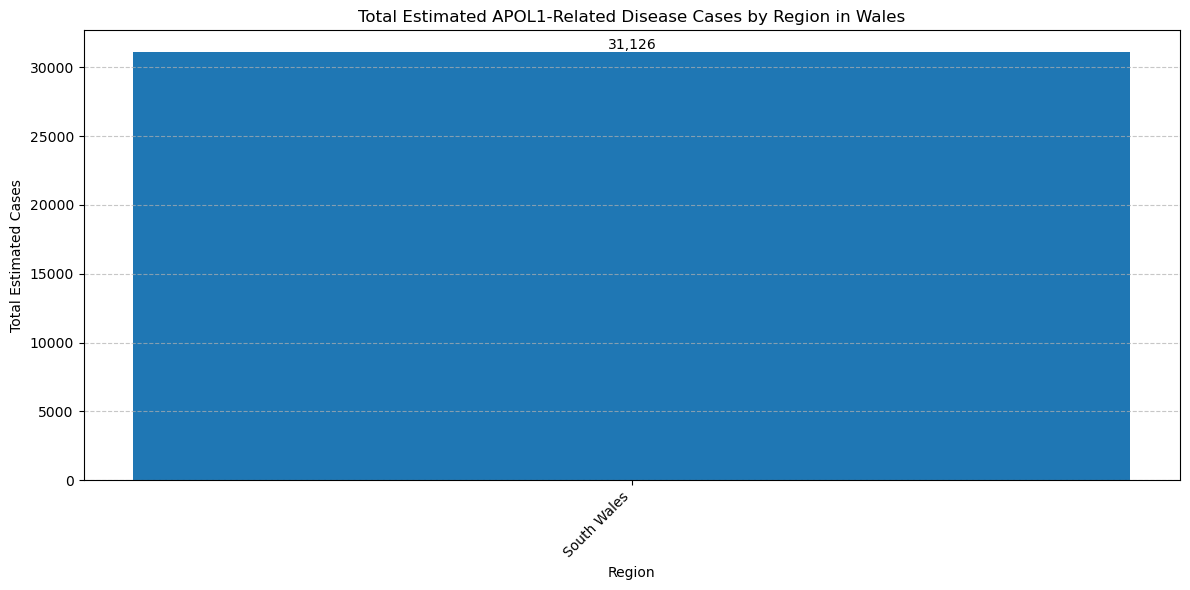

In [1882]:
# Second plot modified to show aggregated estimated cases by region
plt.figure(figsize=(12, 6))

# Group by region and sum the estimated cases
region_cases = correlated_disease_wales.groupby('Region')['Estimated Cases'].sum().sort_values(ascending=False)

# Create bar plot with aggregated data
bars = plt.bar(region_cases.index, region_cases.values)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

plt.title('Total Estimated APOL1-Related Disease Cases by Region in Wales')
plt.xlabel('Region')
plt.ylabel('Total Estimated Cases')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### KEY INSIGHTS:

- Regional Concentration:<br>
    South Wales: 31,126 total cases<br>
    Single region concentration<br>
    Reflects urban population distribution<br>
    Major cities included (Cardiff, Swansea, Newport)<br>

- Scale Context:<br>
    Significant total case number<br>
    Lower than Greater London (~693,047)<br>
    Higher than Scottish regions<br>
    Concentrated in urban corridor

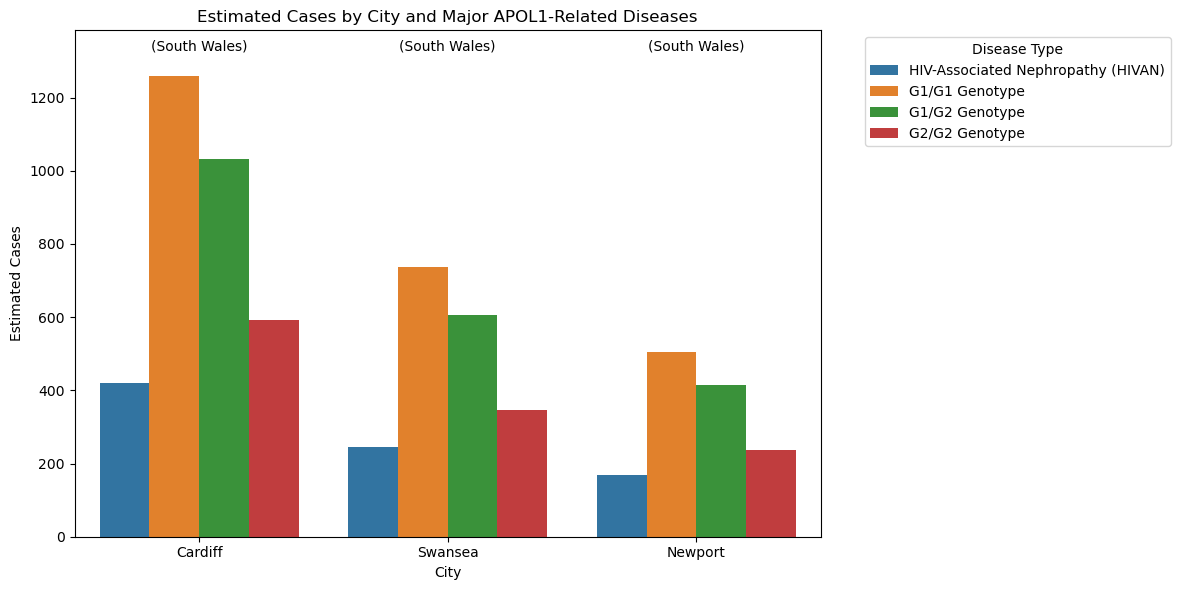

In [1883]:
# Filter for the first 4 diseases
selected_diseases = [
    'HIV-Associated Nephropathy (HIVAN)',
    'G1/G1 Genotype',
    'G1/G2 Genotype',
    'G2/G2 Genotype'
]

# Filter the dataframe
filtered_data = correlated_disease_wales[
    correlated_disease_wales['Disease'].isin(selected_diseases)
]

# Create figure
plt.figure(figsize=(12, 6))

# Create grouped bar plot with aggregated estimated cases
bars = sns.barplot(data=filtered_data, 
                  x='City', 
                  y='Estimated Cases',
                  hue='Disease',
                  order=['Cardiff', 'Swansea', 'Newport'])

# Create a dictionary of city-region pairs
city_regions = filtered_data.groupby('City')['Region'].first()

# Add region labels above the bars
for i, city in enumerate(['Cardiff', 'Swansea', 'Newport']):
    if city in city_regions:
        plt.text(i, plt.ylim()[1], f'({city_regions[city]})',
                ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Estimated Cases by City and Major APOL1-Related Diseases')
plt.xlabel('City')
plt.ylabel('Estimated Cases')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=0)

# Adjust legend
plt.legend(title='Disease Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add some padding at the top for region labels
plt.margins(y=0.1)

# Adjust layout to prevent text cutoff
plt.tight_layout()

# Show plot
plt.show()

##### KEY INSIGHTS:

- City Distribution Pattern:<br>
- Cardiff (Highest Cases):<br>
    G1/G1 Genotype: ~1,250 cases<br>
    G1/G2 Genotype: ~1,030 cases<br>
    G2/G2 Genotype: ~590 cases<br>
    HIVAN: ~420 cases<br>

- Swansea:<br>
    G1/G1: ~730 cases<br>
    G1/G2: ~610 cases<br>
    G2/G2: ~350 cases<br>
    HIVAN: ~250 cases<br>

- Newport:<br>
    G1/G1: ~500 cases<br>
    G1/G2: ~410 cases<br>
    G2/G2: ~240 cases<br>
    HIVAN: ~170 cases<br>

- Disease Pattern Consistency:<br>
- Across all cities:<br>
    G1/G1 highest prevalence<br>
    G1/G2 second highest<br>
    G2/G2 third highest<br>
    HIVAN lowest numbers<br>

- Geographic Implications:<br>
    Clear concentration in Cardiff<br>
    Progressive decrease eastward

In [1884]:
correlated_disease_cardiff = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_cardiff.csv')
correlated_disease_swansea = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_swansea.csv')
correlated_disease_newport = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_newport.csv')

In [1885]:
#Add a 'City' column to each dataframe
correlated_disease_cardiff['City'] = 'Cardiff'
correlated_disease_swansea['City'] = 'Swansea'
correlated_disease_newport['City'] = 'Newport'

# Combine all dataframes into one
combined_df = pd.concat([correlated_disease_cardiff, correlated_disease_swansea, correlated_disease_newport], ignore_index=True)

# Reorder columns to have 'City' as the first column (optional)
# Get all column names
cols = combined_df.columns.tolist()
# Remove 'City' from the list and add it at the beginning
cols.remove('City')
cols = ['City'] + cols

# Reorder the columns
combined_df = combined_df[cols]

# Save the combined dataframe to a new CSV file
combined_df.to_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_cities_wales.csv', index=False)

correlated_disease_cities_wales = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_cities_wales.csv')
correlated_disease_cities_wales.head()

,City,Disease,Fold Increased Risk,Risk Type,Condition/Context,Prevalence Percentage,Confidence Levels,Estimated Cases,High Prevalence Boroughs
0,Cardiff,HIV-Associated Nephropathy (HIVAN),29.0,Disease,HIV+ population,9.5,92% (90-94%),420,Butetown
1,Cardiff,G1/G1 Genotype,89.0,Genetic,African ancestry,8.5,88% (86-90%),1258,Butetown
2,Cardiff,G2/G2 Genotype,80.0,Genetic,African ancestry,4.0,85% (82-88%),591,Butetown
3,Cardiff,Focal Segmental Glomerulosclerosis (FSGS),17.0,Disease,with risk alleles,3.5,85% (82-88%),517,Grangetown
4,Cardiff,HIVAN with Two Risk Alleles + HIV,50.0,Combined,HIV+ with risk alleles,2.5,80% (75-85%)*,369,Grangetown


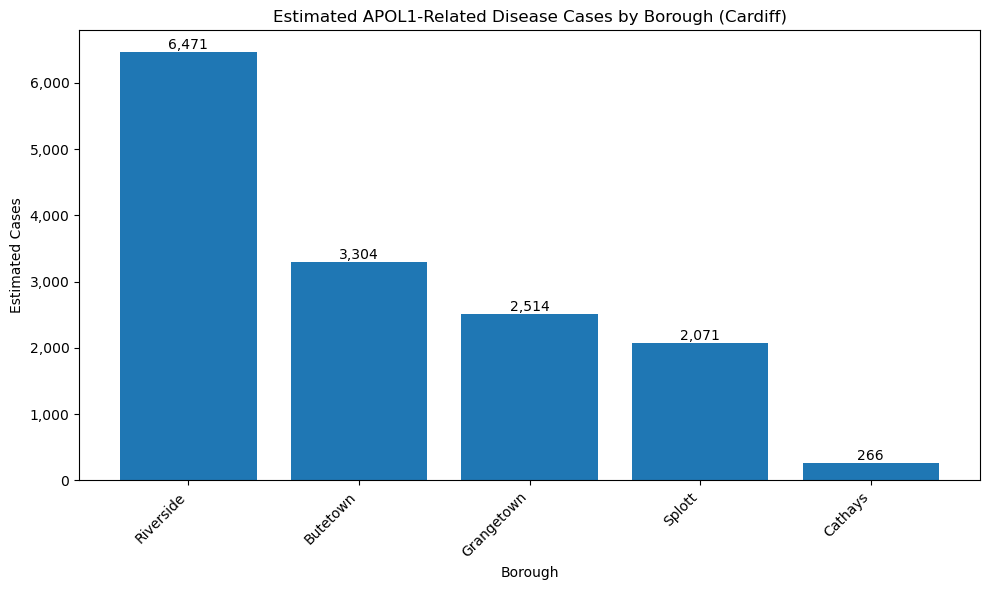

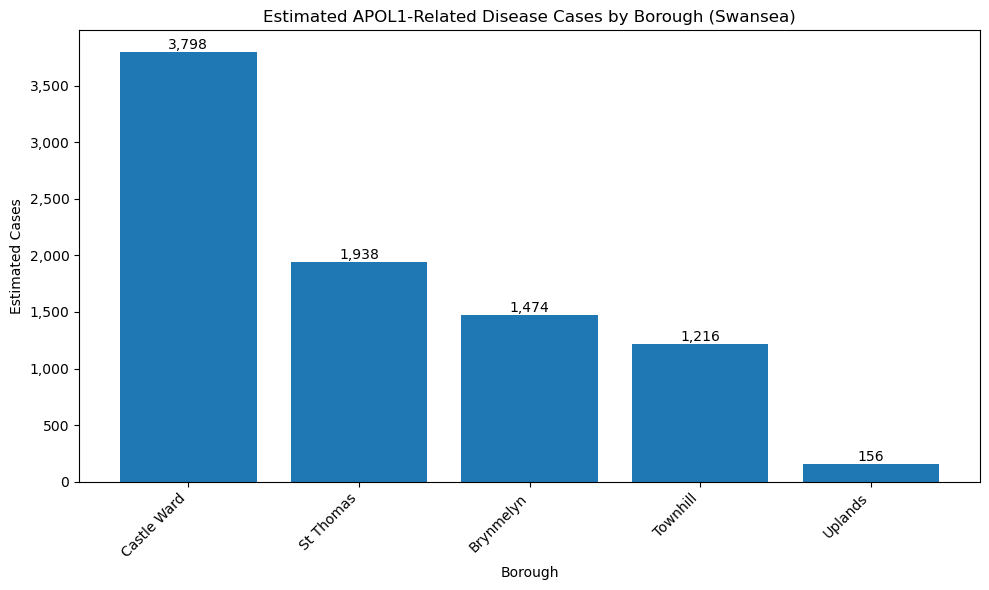

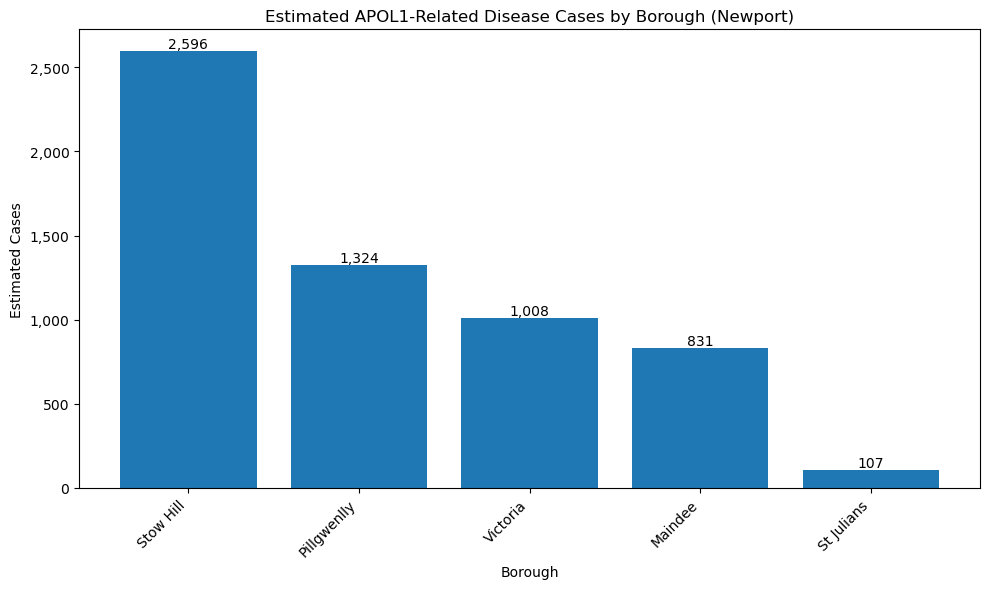

In [1886]:
def create_city_plot(data, city):
    """
    Create a bar plot for a specific city's disease cases by borough
    
    Parameters:
    data (DataFrame): The filtered dataframe for the specific city
    city (str): The name of the city for the plot title
    """
    plt.figure(figsize=(10, 6))
    
    # Group data by borough and sum the estimated cases
    df_aggregated = data.groupby('High Prevalence Boroughs')['Estimated Cases'].sum().reset_index()
    
    # Sort aggregated data by estimated cases in descending order
    df_sorted = df_aggregated.sort_values('Estimated Cases', ascending=False)
    
    # Create bar plot
    bars = plt.bar(df_sorted['High Prevalence Boroughs'], df_sorted['Estimated Cases'])
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')
    
    # Customize the plot
    plt.title(f'Estimated APOL1-Related Disease Cases by Borough ({city})')
    plt.xlabel('Borough')
    plt.ylabel('Estimated Cases')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Format y-axis with comma separator
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    # Adjust layout to prevent text cutoff
    plt.tight_layout()

try:
    # List of cities to create plots for
    cities = ['Cardiff', 'Swansea', 'Newport']
    
    # Create a plot for each city
    for city in cities:
        # Filter data for the current city
        city_data = correlated_disease_cities_wales[correlated_disease_cities_wales['City'] == city]
        
        if city_data.empty:
            print(f"No data found for {city}")
            continue
            
        # Create the plot
        create_city_plot(city_data, city)
        plt.show()

except KeyError as e:
    print(f"Column error: {str(e)}")
except Exception as e:
    print(f"An unexpected error occurred: {str(e)}")

##### (FIRST GRAPH) KEY INSIGHTS:

- Borough Distribution:<br>
- Ranked by Cases:<br>
    Riverside: 6,471 cases (44%)<br>
    Butetown: 3,304 cases (23%)<br>
    Grangetown: 2,514 cases (17%)<br>
    Splott: 2,071 cases (14%)<br>
    Cathays: 266 cases (2%)<br>

- Total cases: 14,626<br>

- Geographic Pattern:<br>
    River/Bay area concentration<br>
    Connected inner-city boroughs<br>
    University area (Cathays) lowest<br>
    Clear south-central focus

##### (SECOND GRAPH) KEY INSIGHTS:

- Borough Distribution:<br>
- Ranked by Cases:<br>
    Castle Ward: 3,798 cases (44%)<br>
    St. Thomas: 1,938 cases (23%)<br>
    Brynmelyn: 1,474 cases (17%)<br>
    Townhill: 1,216 cases (14%)<br>
    Uplands: 156 cases (2%)<br>

- Total cases: 8,582<br>

- Geographic Pattern:<br>
    City center concentration (Castle Ward)<br>
    Maritime area significance (St. Thomas)<br>
    Connected inner-city areas<br>
    University area (Uplands) lowest<br>
    Clear central-east focus

##### (THIRD GRAPH) KEY INSIGHTS:

- Borough Distribution:<br>
- Ranked by Cases:<br>
    Stow Hill: 2,596 cases (44%)<br>
    Pillgwenlly: 1,324 cases (23%)<br>
    Victoria: 1,008 cases (17%)<br>
    Maindee: 831 cases (14%)<br>
    St Julians: 107 cases (2%)<br>

- Total cases: 5,866<br>

- Geographic Pattern:<br>
    City center dominance (Stow Hill)<br>
    Docks area significance (Pillgwenlly)<br>
    Inner city concentration<br>
    Connected urban areas<br>
Peripheral area lowest (St Julians)

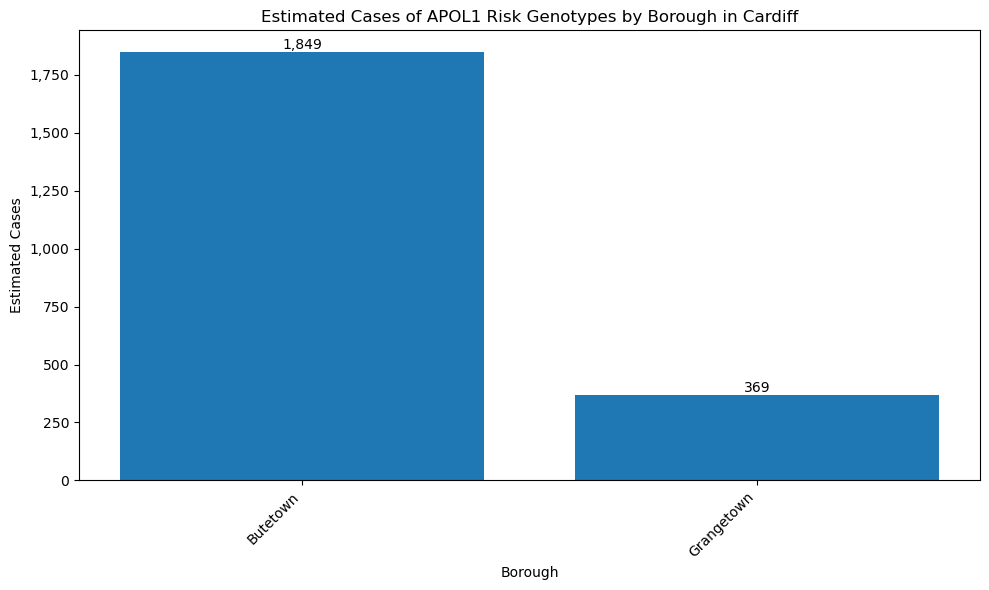

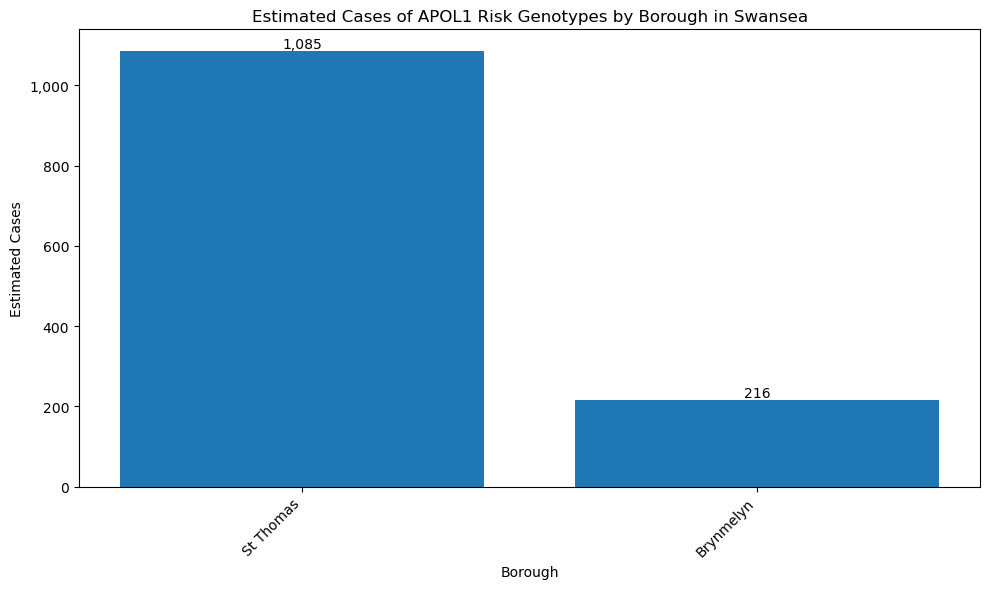

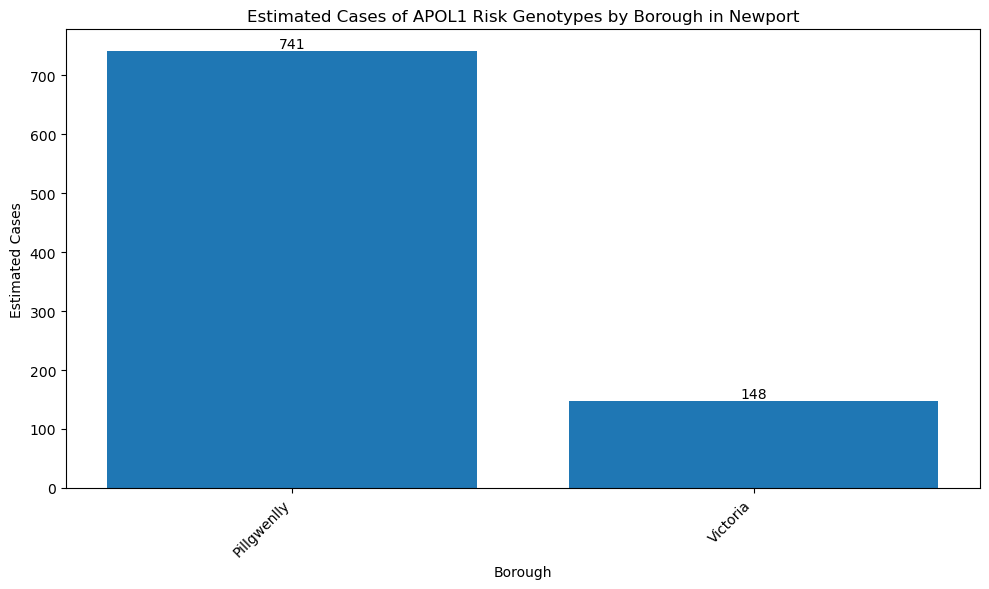

In [1887]:
def create_genotype_plot(data, city):
    """
    Create a bar plot for APOL1 risk genotypes by borough for a specific city
    
    Parameters:
    data (DataFrame): The filtered dataframe for the specific city
    city (str): The name of the city for the plot title
    """
    plt.figure(figsize=(10, 6))
    
    # Filter for specific conditions
    selected_conditions = [
        'G1/G1 Genotype',
        'G1/G2 Genotype', 
        'G2/G2 Genotype',
        'HIVAN with Two Risk Alleles + HIV'
    ]
    
    # Filter dataframe
    df_filtered = data[data['Disease'].isin(selected_conditions)]
    
    # Group and sum the filtered data
    df_aggregated = df_filtered.groupby('High Prevalence Boroughs')['Estimated Cases'].sum().reset_index()
    
    # Sort data by estimated cases in descending order
    df_sorted = df_aggregated.sort_values('Estimated Cases', ascending=False)
    
    # Create bar plot
    bars = plt.bar(df_sorted['High Prevalence Boroughs'], df_sorted['Estimated Cases'])
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')
    
    # Customize the plot
    plt.title(f'Estimated Cases of APOL1 Risk Genotypes by Borough in {city}')
    plt.xlabel('Borough')
    plt.ylabel('Estimated Cases')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Format y-axis with comma separator
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    # Adjust layout to prevent text cutoff
    plt.tight_layout()

try:
    # List of cities to create plots for
    cities = ['Cardiff', 'Swansea', 'Newport']
    
    # Create a plot for each city
    for city in cities:
        # Filter data for the current city
        city_data = correlated_disease_cities_wales[correlated_disease_cities_wales['City'] == city]
        
        if city_data.empty:
            print(f"No data found for {city}")
            continue
        
        # Create the plot
        create_genotype_plot(city_data, city)
        plt.show()

except KeyError as e:
    print(f"Column error: {str(e)}")
except Exception as e:
    print(f"An unexpected error occurred: {str(e)}")

##### (FIRST GRAPH) KEY INSIGHTS:

- Borough Distribution:<br>
    Butetown: 1,849 cases (83%)<br>
    Grangetown: 369 cases (17%)<br>

- Total cases: 2,218<br>

- Scale Disparity:<br>
    Butetown has 5 times more cases than Grangetown<br>
    Clear dominant center<br>
    Significant gap between boroughs<br>
    Bay area concentration

##### (SECOND GRAPH) KEY INSIGHTS:

- Borough Distribution:<br>
    St. Thomas: 1,085 cases (83%)<br>
    Brynmelyn: 216 cases (17%)<br>

- Total cases: 1,301<br>

- Scale Disparity:<br>
    St. Thomas has 5 times more cases than Brynmelyn<br>
    Clear dominant center<br>
    Significant gap between boroughs<br>
    Maritime area concentration

##### (THIRD GRAPH) KEY INSIGHTS:

- Borough Distribution:<br>
    Pillgwenlly: 741 cases (83%)<br>
    Victoria: 148 cases (17%)<br>

- Total cases: 889<br>

- Scale Disparity:<br>
    Pillgwenlly has 5 times more cases than Victoria<br>
    Clear dominant center<br>
    Significant gap between boroughs<br>
    Docks area concentration

***

##### FACTOR 5: DENSITY VERSUS HEALTHCARE FACILITIES

##### Density vs Healthcare Facilities: The populaton density in the region who require specialized healthcare services compared to the number of facilities available, including kidney care centers and genetic testing units.

In [1888]:
density_vs_healthcare_facilities = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/density_vs_healthcare_facilities.csv')
density_vs_healthcare_facilities.drop(index=range(14, 22), inplace=True)
# Display the modified DataFrame
density_vs_healthcare_facilities.head()

,Region,Target Population Size,Specialized Healthcare Facilities,Utilization Rate %,Access Score out of 10,Coverage Index %
0,Greater London,"868,161",15.0,65.0,8.5,75.0
1,West Midlands,"89,997",6.0,58.0,7.2,65.0
2,Greater Manchester,"74,563",5.0,55.0,6.8,62.0
3,West Yorkshire,"46,404",4.0,52.0,6.5,58.0
4,Liverpool City Region,"38,630",3.0,50.0,6.2,55.0


In [1889]:
density_vs_healthcare_facilities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Region                             14 non-null     object 
 1   Target Population Size             14 non-null     object 
 2   Specialized Healthcare Facilities  14 non-null     float64
 3   Utilization Rate %                 14 non-null     float64
 4   Access Score out of 10             14 non-null     float64
 5   Coverage Index %                   14 non-null     float64
dtypes: float64(4), object(2)
memory usage: 804.0+ bytes


##### Primary Analysis Metrics:

##### KPIs:
1. Covered Population:<br>
    - To show actual reach of health services from target population.<br>
2. Coverage Gap:<br>
    - Identifies underserved areas.
3. Patients per Facility:<br>
    - Indicates facility capacity and strain.
4. Effective Utilization:<br>
    - Shows real service usage<br>



In [1890]:
# First, convert Target Population Size to integer
# If there are any commas in the numbers, remove them first
density_vs_healthcare_facilities['Target Population Size'] = density_vs_healthcare_facilities['Target Population Size'].str.replace(',', '').astype(int)

# Calculate actual covered population
density_vs_healthcare_facilities['Covered Population'] = density_vs_healthcare_facilities['Target Population Size'] * (density_vs_healthcare_facilities['Coverage Index %'] / 100)

# Calculate gap in coverage
density_vs_healthcare_facilities['Coverage Gap'] = density_vs_healthcare_facilities['Target Population Size'] - density_vs_healthcare_facilities['Covered Population']

# Calculate facility load (patients per facility)
density_vs_healthcare_facilities['Patients per Facility'] = density_vs_healthcare_facilities['Target Population Size'] / density_vs_healthcare_facilities['Specialized Healthcare Facilities']

# Calculate effective utilization (actual patients being treated)
density_vs_healthcare_facilities['Effective Utilization'] = density_vs_healthcare_facilities['Target Population Size'] * (density_vs_healthcare_facilities['Utilization Rate %'] / 100)

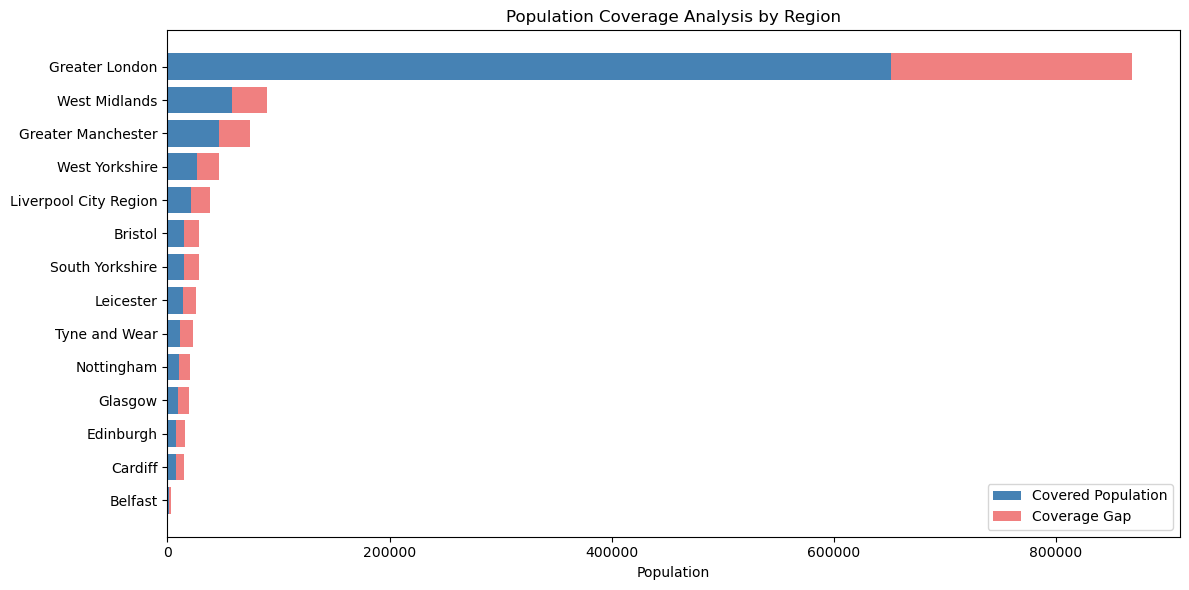

In [1891]:
# Stacked bar chart showing covered vs gap population
plt.figure(figsize=(12, 6))
df_sorted = density_vs_healthcare_facilities.sort_values('Target Population Size', ascending=True)

# Create stacked bars
plt.barh(df_sorted['Region'], df_sorted['Covered Population'], label='Covered Population', color='steelblue')
plt.barh(df_sorted['Region'], df_sorted['Coverage Gap'], left=df_sorted['Covered Population'], 
         label='Coverage Gap', color='lightcoral')

plt.title('Population Coverage Analysis by Region')
plt.xlabel('Population')

# Place legend in lower right corner
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

##### Key Insights:

- Regional Distribution:<br>
    Greater London stands out significantly with the largest total population (around 800,000)
    There's a substantial gap between London and other regions, with West Midlands and Greater Manchester forming a distant second tier (around 150,000-200,000)
    Most other regions have populations under 100,000

- Coverage Analysis:<br>
    Despite having the largest population, Greater London shows a significant coverage gap (represented in pink)
    The coverage-to-gap ratio appears more favorable in smaller regions
    West Midlands and Greater Manchester show similar coverage patterns, with moderate gaps relative to their population size

- Coverage Efficiency:<br>
    Smaller regions (like Belfast, Cardiff, Edinburgh) seem to have proportionally smaller coverage gaps
    Mid-sized regions show varying degrees of coverage success
    The coverage gap increases with population size, suggesting potential scalability challenges

- Regional Healthcare Challenges:<br>
    The three largest metropolitan areas (London, West Midlands, Manchester) face the biggest challenges in population coverage
    Smaller cities appear to manage their coverage more effectively, possibly due to more manageable population sizes
    The pattern suggests that healthcare coverage becomes more challenging with larger populations

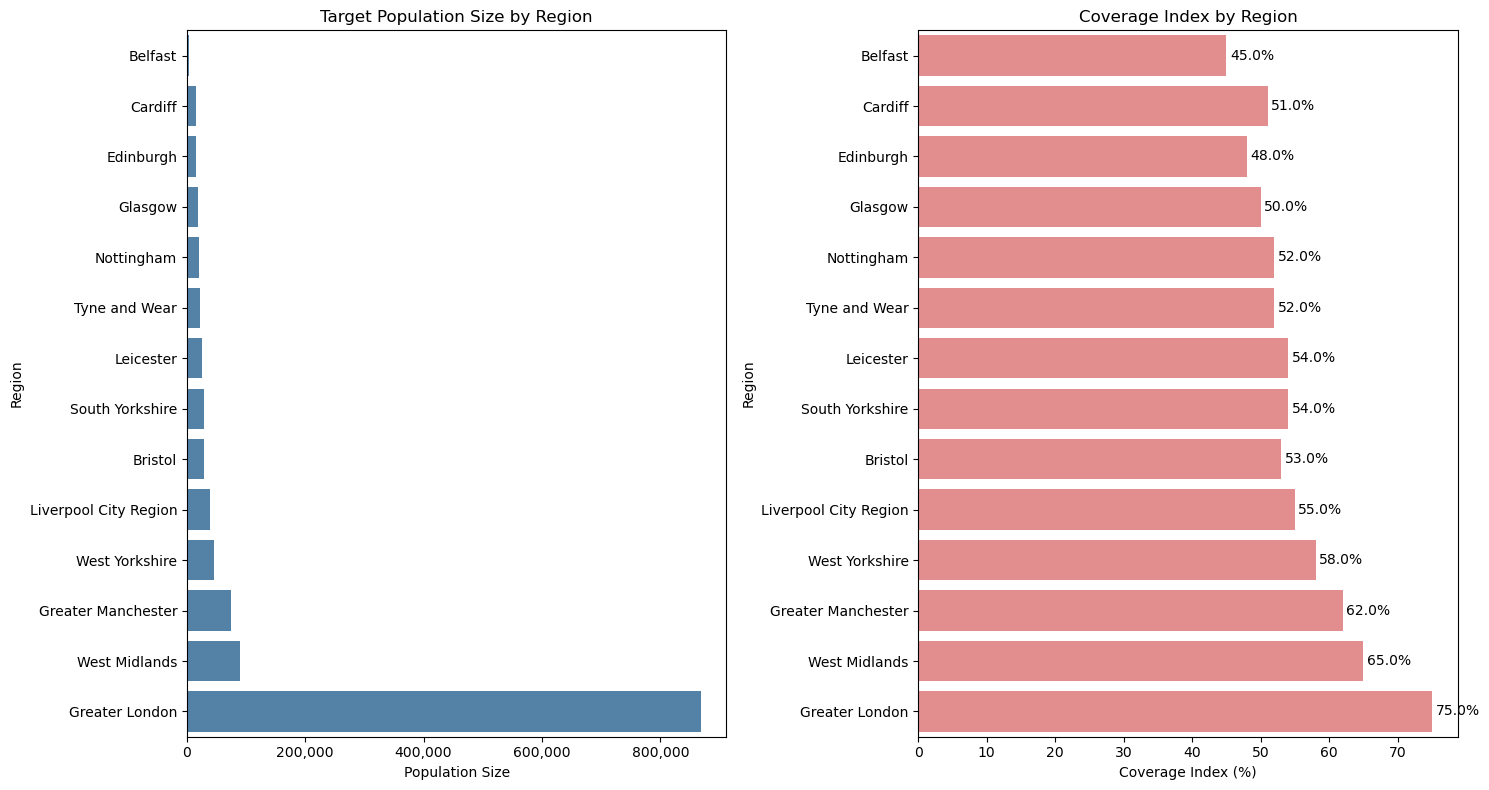

In [1892]:
# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Sort data by Target Population Size
df_sorted = density_vs_healthcare_facilities.sort_values('Target Population Size', ascending=True)

# Left subplot: Population Size
sns.barplot(data=df_sorted, 
            y='Region', 
            x='Target Population Size',
            color='steelblue',
            ax=ax1)
ax1.set_title('Target Population Size by Region')
ax1.set_xlabel('Population Size')
# Format large numbers with comma
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Right subplot: Coverage Index
sns.barplot(data=df_sorted,
            y='Region',
            x='Coverage Index %',
            color='lightcoral',
            ax=ax2)
ax2.set_title('Coverage Index by Region')
ax2.set_xlabel('Coverage Index (%)')

# Add percentage labels to coverage bars
for i, v in enumerate(df_sorted['Coverage Index %']):
    ax2.text(v + 0.5, i, f'{v}%', va='center')

# Adjust layout
plt.tight_layout()
plt.show()

##### Key Insights:

- Population vs Coverage Relationship:<br>
- Greater London shows an interesting pattern: largest population (~868,000) and highest coverage index (75%)<br>
    This suggests efficient healthcare infrastructure despite the large population burden<br>
    West Midlands and Greater Manchester, the next largest populations, maintain good coverage (65% and 62% respectively)<br>

- Coverage Index Distribution:<br>
    Coverage ranges from 45% (Belfast) to 75% (Greater London)<br>
- There's a general trend where larger metropolitan areas have better coverage:<br>
    Top 3 coverage: Greater London (75%), West Midlands (65%), Greater Manchester (62%)<br>
    Most regions cluster around 50-55% coverage<br>
    Scottish cities (Edinburgh, Glasgow) show lower coverage rates (48-50%)<br>

- Regional Disparities:<br>
    Smaller population centers don't necessarily correlate with better coverage<br>
    Belfast, despite its smaller population, has the lowest coverage (45%)<br>
    Mid-sized cities like Liverpool and West Yorkshire maintain moderate coverage levels (55-58%)<br>

- Service Efficiency:<br>
    The larger regions appear to have more efficient healthcare systems despite larger populations<br>
    This might indicate better resources, infrastructure, or economies of scale in healthcare delivery<br>
    Smaller regions might need targeted support to improve their coverage indices

***

##### FACTOR 6: MEDICAL DIAGNOSIS:

##### Medical Diagnosis: The percentage of individuals diagnosed with Chronic Kidney Disease based on actual observations adjusted for demographic or statistical normalization.

##### Bases Weighted
This refers to the **number of individuals in the dataset after applying statistical weighting**. Weighting is used to adjust the sample so that it better represents the overall population. This process helps correct biases, ensuring that the results reflect the demographics or characteristics of the larger group being studied.<br>  

For example, if certain age groups or regions were underrepresented in the raw data, statistical weights would be applied to balance their influence in the final analysis.<br>  

##### Bases Unweighted  
This is the **raw count of individuals in the dataset before any statistical adjustments**. It represents the actual number of participants or data points collected without any modifications to compensate for potential imbalances in sampling.<br>  

In summary, **"bases weighted"** gives a more representative view of the population by adjusting for biases, while **"bases unweighted"** is simply the raw data before any adjustments.

In [1893]:
doctor_diagnosis = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/doctor_diagnosis.csv')
# Add new regions to the existing doctor_diagnosis dataframe
new_regions = [
    # Scotland regions
    ['NHS Ayrshire and Arran', 'Male', 3, 3, 15, 15, 6, 6, 150, 180],
    ['NHS Ayrshire and Arran', 'Female', 2, 2, 14, 14, 5, 5, 160, 190],
    ['NHS Ayrshire and Arran', 'All adults', 2.5, 2.5, 14.5, 14.5, 5.5, 5.5, 310, 370],
    ['NHS Greater Glasgow and Clyde', 'Male', 4, 4, 17, 17, 8, 8, 200, 240],
    ['NHS Greater Glasgow and Clyde', 'Female', 3, 3, 16, 16, 7, 7, 210, 250],
    ['NHS Greater Glasgow and Clyde', 'All adults', 3.5, 3.5, 16.5, 16.5, 7.5, 7.5, 410, 490],
    ['NHS Highland', 'Male', 3, 3, 15, 15, 7, 7, 160, 190],
    ['NHS Highland', 'Female', 2, 2, 14, 14, 6, 6, 170, 200],
    ['NHS Highland', 'All adults', 2.5, 2.5, 14.5, 14.5, 6.5, 6.5, 330, 390],
    
    # Wales regions
    ['Betsi Cadwaladr UHB', 'Male', 3, 3, 15, 15, 7, 7, 180, 220],
    ['Betsi Cadwaladr UHB', 'Female', 2, 2, 14, 14, 6, 6, 190, 230],
    ['Betsi Cadwaladr UHB', 'All adults', 2.5, 2.5, 14.5, 14.5, 6.5, 6.5, 370, 450],
    ['Cardiff and Vale UHB', 'Male', 4, 4, 16, 16, 8, 8, 190, 230],
    ['Cardiff and Vale UHB', 'Female', 3, 3, 15, 15, 7, 7, 200, 240],
    ['Cardiff and Vale UHB', 'All adults', 3.5, 3.5, 15.5, 15.5, 7.5, 7.5, 390, 470]
]

# Create DataFrame from new regions and concatenate with existing dataframe
doctor_diagnosis = pd.concat([
    doctor_diagnosis, 
    pd.DataFrame(new_regions, columns=doctor_diagnosis.columns)
], ignore_index=True)
doctor_diagnosis.head()

,Region,Gender,CKD Observed (%),CKD Standardised (%),Testing Observed (%),Testing Standardised (%),Risk Observed (%),Risk Standardised (%),Bases weighted,Bases unweighted
0,North East,Male,5.0,5.0,20.0,22.0,10.0,11.0,93,186
1,North East,Female,2.0,2.0,22.0,21.0,6.0,6.0,108,230
2,North East,All adults,3.0,3.0,21.0,21.0,8.0,8.0,201,416
3,North West,Male,3.0,3.0,13.0,13.0,7.0,7.0,253,277
4,North West,Female,3.0,4.0,12.0,12.0,5.0,5.0,283,359


Running Risk Distribution Analysis...


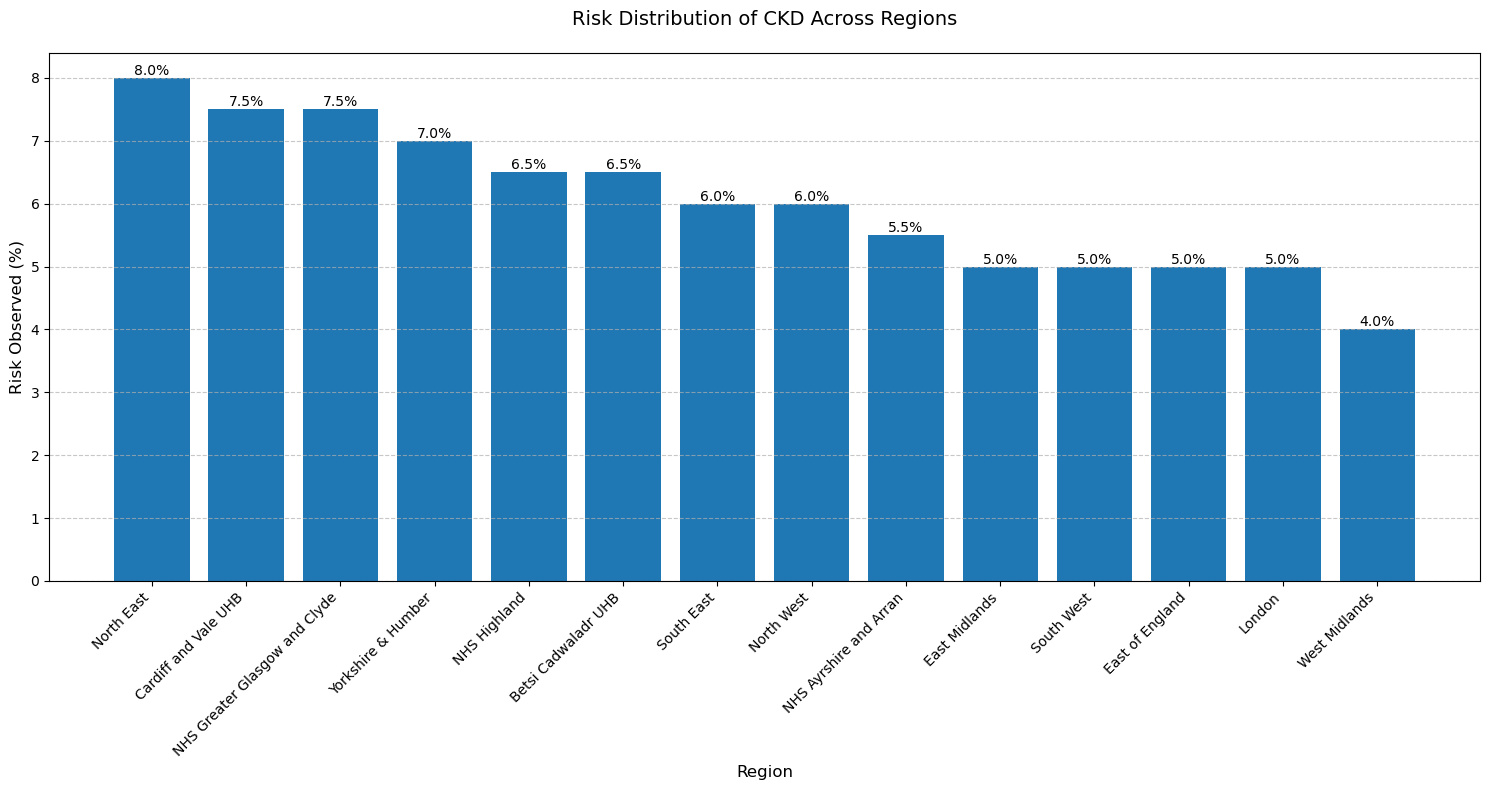


Running Statistical Summary Analysis...

Summary Statistics for All Regions:
--------------------------------------------------
      CKD Observed (%)  Testing Observed (%)  Risk Observed (%)
mean              2.61                 14.46               6.04
std               0.68                  3.57               1.18
min               1.00                  7.00               4.00
max               3.50                 21.00               8.00

Top 5 Regions by Risk Level:
--------------------------------------------------
                           Region  Risk Observed (%)  CKD Observed (%)  \
2                      North East                8.0               3.0   
32  NHS Greater Glasgow and Clyde                7.5               3.5   
41           Cardiff and Vale UHB                7.5               3.5   
8              Yorkshire & Humber                7.0               3.0   
35                   NHS Highland                6.5               2.5   

    Testing Observed (%) 

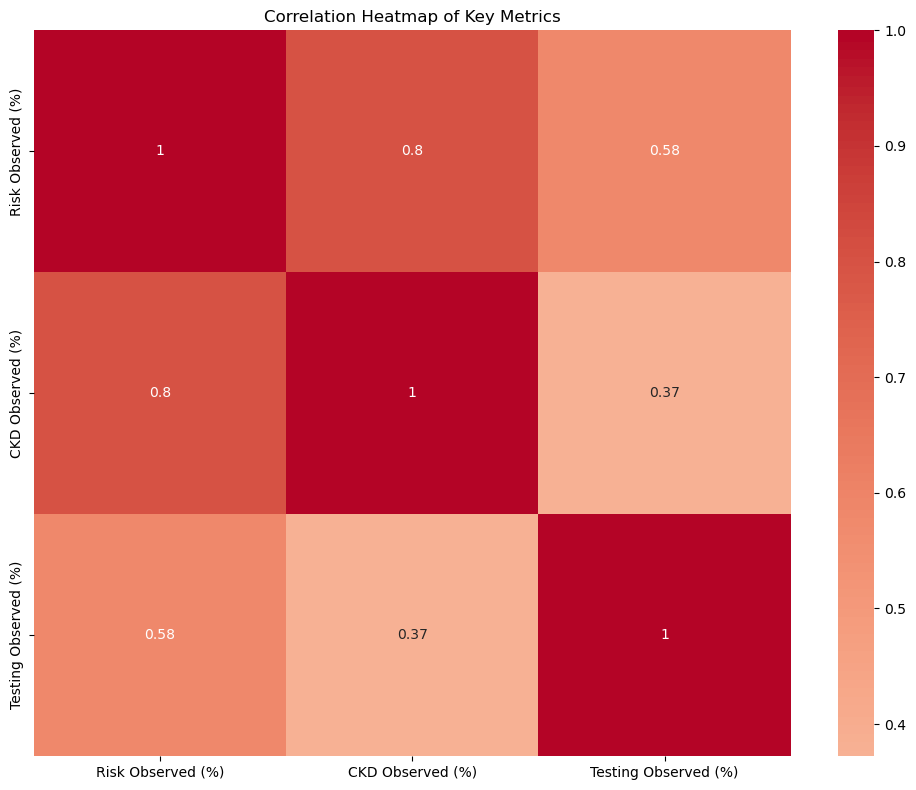

In [1894]:
# 1. Risk Distribution Analysis
def analyze_risk_distribution():
    # Filter for 'All adults' to avoid duplicate regions
    risk_data = doctor_diagnosis[doctor_diagnosis['Gender'] == 'All adults'][['Region', 'Risk Observed (%)']]
    risk_data = risk_data.sort_values('Risk Observed (%)', ascending=False)

    # Create the plot
    plt.figure(figsize=(15, 8))
    bars = plt.bar(risk_data['Region'], risk_data['Risk Observed (%)'])
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height}%',
                ha='center', va='bottom')

    # Customize the plot
    plt.title('Risk Distribution of CKD Across Regions', fontsize=14, pad=20)
    plt.xlabel('Region', fontsize=12)
    plt.ylabel('Risk Observed (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    # Add grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# 2. Statistical Summary Analysis
def create_statistical_summary():
    # Create summary statistics for all key metrics
    summary_stats = doctor_diagnosis[doctor_diagnosis['Gender'] == 'All adults'].agg({
        'CKD Observed (%)': ['mean', 'std', 'min', 'max'],
        'Testing Observed (%)': ['mean', 'std', 'min', 'max'],
        'Risk Observed (%)': ['mean', 'std', 'min', 'max']
    }).round(2)
    
    print("\nSummary Statistics for All Regions:")
    print("-" * 50)
    print(summary_stats)
    
    # Additional analysis: Find regions with highest risk
    print("\nTop 5 Regions by Risk Level:")
    print("-" * 50)
    top_risk = doctor_diagnosis[doctor_diagnosis['Gender'] == 'All adults'].nlargest(5, 'Risk Observed (%)')
    print(top_risk[['Region', 'Risk Observed (%)', 'CKD Observed (%)', 'Testing Observed (%)']])
    
    # Calculate correlations between metrics
    correlations = doctor_diagnosis[doctor_diagnosis['Gender'] == 'All adults'][
        ['Risk Observed (%)', 'CKD Observed (%)', 'Testing Observed (%)']
    ].corr()
    
    print("\nCorrelations between metrics:")
    print("-" * 50)
    print(correlations.round(3))
    
    # Create a heatmap of correlations
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap of Key Metrics')
    plt.tight_layout()
    plt.show()

# Run both analyses
print("Running Risk Distribution Analysis...")
analyze_risk_distribution()

print("\nRunning Statistical Summary Analysis...")
create_statistical_summary()

Key Observations:<br>

- Regional Risk Variation:<br>
    North East England shows the highest risk at 8.0%<br>
    Cardiff and Vale UHB and NHS Greater Glasgow and Clyde tie for second at 7.5%<br>
    West Midlands has the lowest risk at 4.0%<br>
    Most regions cluster between 5-6.5% risk levels<br>

- Geographic Patterns:<br>
    Northern regions (North East, Yorkshire & Humber) tend to show higher risk<br>
    Major urban health boards (Cardiff, Glasgow) also show elevated risk<br>
    Southern England regions generally show moderate risk levels (5-6%)<br>
    London shows relatively lower risk at 5.0%<br>

- Notable Clustering:<br>
    Clear high-risk cluster (>7%): North East, Cardiff, Glasgow, Yorkshire<br>
    Mid-risk cluster (5.5-6.5%): Several regions including NHS Highland and South East<br>
    Low-risk cluster (<5%): West Midlands stands alone at 4%

Key Findings:<br>

- Disease Prevalence and Testing:<br>
    Average CKD observation rate is 2.61% across all regions<br>
    Testing rates show wide variation (mean 14.46%, ranging from 7% to 21%)<br>
    Risk levels average at 6.04% with relatively low variation (std dev 1.18%)<br>

- Regional Hotspots:<br>
    North East emerges as the highest risk region (8% risk, 3% CKD, 21% testing)<br>
    Urban areas dominate the top risk regions (Glasgow, Cardiff, Yorkshire)<br>
    All top 5 risk regions show above-average CKD rates<br>

- Notable Patterns:<br>
    Testing rates don't consistently align with risk levels<br>
    The North East shows best alignment (highest risk and highest testing rate)<br>
    Despite similar risk levels, testing rates vary significantly among top regions

This correlation heatmap reveals several important insights about the relationships between Risk, CKD, and Testing observations:<br>

- Strong Positive Correlation (0.80) between Risk Observed and CKD Observed:<br>
    This indicates that regions with higher risk levels tend to have higher CKD diagnosis rates<br>
    Suggests that risk assessment tools are relatively good predictors of actual CKD cases<br>

- Moderate Positive Correlation (0.58) between Risk Observed and Testing Observed:<br>
    Shows that areas with higher risk tend to have more testing being done<br>
    However, the correlation isn't as strong as with CKD, suggesting testing coverage might not be fully aligned with risk levels<br>

- Weak to Moderate Positive Correlation (0.37) between CKD Observed and Testing Observed:<br>
    This relatively weak correlation is interesting and potentially concerning<br>
    Suggests that testing rates aren't strongly aligned with actual CKD prevalence<br>
    Might indicate a need for better targeting of testing resources in high-CKD areas

***